# Spaceship Titanic - Machine Learning Competition

### Group Members
       Muaawiyah Dadabhay - 2426234
       Muhammed Raees Dindar -2453739
       Taahir Kolia - 2423748
       Irfaan Mia - 2434204

## Introduction

In this notebook, four machine-learning models are employed to predict whether passengers were transported to an alternate dimension, utilizing data frames sourced from Kaggle. The models utilized include _w_, _x_, _y_, and _z_.

Kaggle stands as a prominent data science platform renowned for hosting competitions and challenges in the field. It boasts a vibrant community comprising data scientists, statisticians, and machine learning experts who actively contribute their expertise to various projects.

For this particular endeavor, we leverage the Spaceship Titanic dataset available on Kaggle. The primary objective of this notebook is to ascertain which passengers were transported to an alternate dimension subsequent to a spaceship collision.

The methodology entails an initial data analysis, followed by feature engineering to facilitate modeling. Subsequently, the models are constructed and trained utilizing the provided dataset. Finally, comprehensive evaluations of all four models are conducted to ascertain the optimal choice for predicting passenger transportation to alternate dimensions.

## Importing of Python Libraries

In [1]:
#General imports
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm.auto import tqdm

#Analysis imports
import sweetviz as sw
import matplotlib.pyplot as plt

#Imputator and encoder imports
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#Evaluation imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

#Classifiers imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Feature elimination imports
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV
import optuna
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score

#I dont know just something it was recommended not sure why
import warnings
warnings.filterwarnings("ignore")



## 1. Gathering and Understanding Data

The focus of this Section is on collecting and comprehending the dataset. The process begins with loading the data from a CSV file in Section 1.1. Following this, Section 1.2 entails a thorough examination of the dataset to gain insights into its structure and contents. Subsequently, Section 1.3 delves deeper into understanding the significance and characteristics of the data at hand. Detecting and handling duplicate values within the dataset is discussed in Section 1.4, while Section 1.5 addresses the identification and treatment of missing values to ensure data integrity and completeness.

### 1.1 Loading Data from a CSV

In [2]:
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

### 1.2 Viewing of the Data

In [3]:
test_df.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  
0          0.0        0.0           0.0     0.0     0.0  Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0   Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0  Sabih Unhearfus

In [4]:
train_df.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

   Transported  
0        False  
1         True  
2        False

### 1.3 Understanding the Data at Hand

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Categorical data, including __HomePlanet__, __CryoSleep__, __Destination__, and __VIP__, is observed in the dataframes. These features will undergo transformation into numerical representations for further analysis.

### 1.4 Determining Duplicate Values

In [7]:
print(f"The total duplicates in the test dataframe are: {test_df.duplicated().sum()}")
print(f"The total duplicates in the train dataframe are: {train_df.duplicated().sum()}")

The total duplicates in the test dataframe are: 0
The total duplicates in the train dataframe are: 0


### 1.5 Determining Missing Values

In [8]:
print("Test Dataframes Missing Values")
test_df.isna().sum()

Test Dataframes Missing Values


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
print("Train Dataframes Missing Values")
train_df.isna().sum()

Train Dataframes Missing Values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

Both dataframes contain missing values, necessitating data manipulation. Initially, missing values will be replaced with _NaN_. Subsequently, dataframes will be merged for efficient filling of values and separated as needed in subsequent stages.

In [10]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
temp_combined_df = combined_df.copy()

In [11]:
combined_df.replace('', np.NaN, inplace=True)
combined_df.fillna(np.NaN, inplace=True)
combined_df.tail(3)

PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
12967     9271_01       Mars      True   D/296/P    55 Cancri e   NaN  False   
12968     9273_01     Europa     False   D/297/P            NaN   NaN  False   
12969     9277_01      Earth      True  G/1498/S  PSO J318.5-22  43.0  False   

       RoomService  FoodCourt  ShoppingMall  Spa  VRDeck              Name  \
12967          0.0        0.0           0.0  0.0     0.0       Jayrin Pore   
12968          0.0     2680.0           0.0  0.0   523.0    Kitakan Conale   
12969          0.0        0.0           0.0  0.0     0.0  Lilace Leonzaley   

      Transported  
12967         NaN  
12968         NaN  
12969         NaN

## 2. Data Analysis

In this section, the dataset undergoes a comprehensive analysis to gain insights into its categorical and numerical features. Section 2.1 focuses on the examination and exploration of categorical features. Following this, in Section 2.2, an analysis of numerical features is conducted.

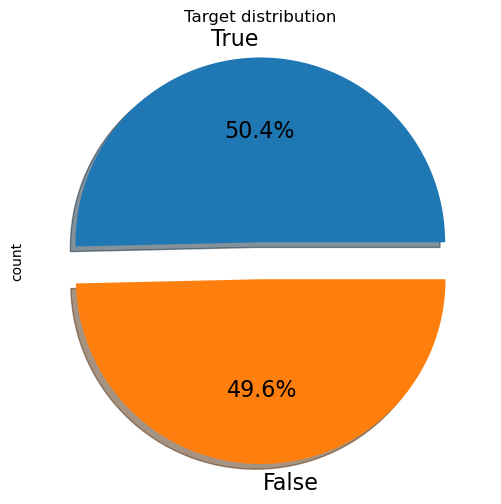

In [12]:
# Figure size
plt.figure(figsize=(6,6));

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution");

The target feature, __Transported__, indicates whether passengers were transported to another dimension, with approximately half being transported.

### 2.1 Categorical Feature Analysis

The categorical features are analysed to determine how the target feature depends on the categorical features.

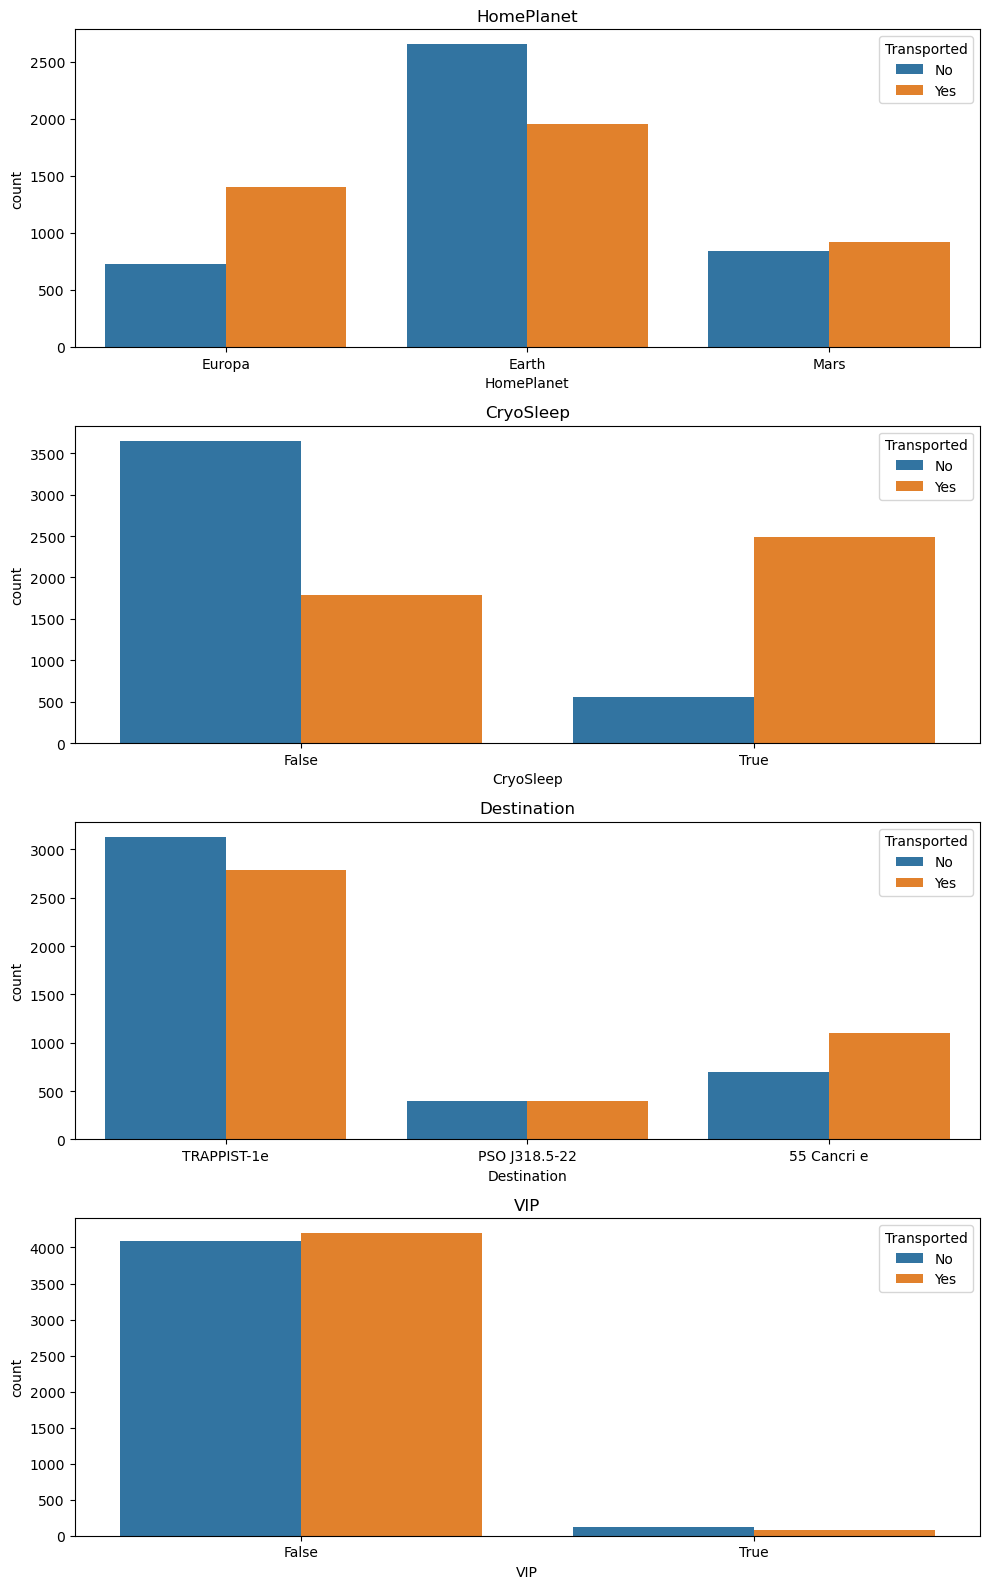

In [13]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Convert boolean values to strings ('Yes' and 'No')
temp_combined_df['Transported'] = combined_df['Transported'].map({True: 'Yes', False: 'No'})

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=temp_combined_df, x=var_name, ax=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The relationship between categorical features and "Transported" is explored. While no direct relationship is found with __HomePlanet__,__Destination__, and __VIP__, __CryoSleep__ appears correlated, indicating a higher likelihood of transportation for those in __CryoSleep__. [1]

[1] S. Cortinhas, "Spaceship Titanic: A Complete Guide," Kaggle, https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA (accessed Mar. 28, 2024).

### 2.2 Numerical Feature Analysis


The numerical features are analysed to determine how the target feature depends on the numerical features.

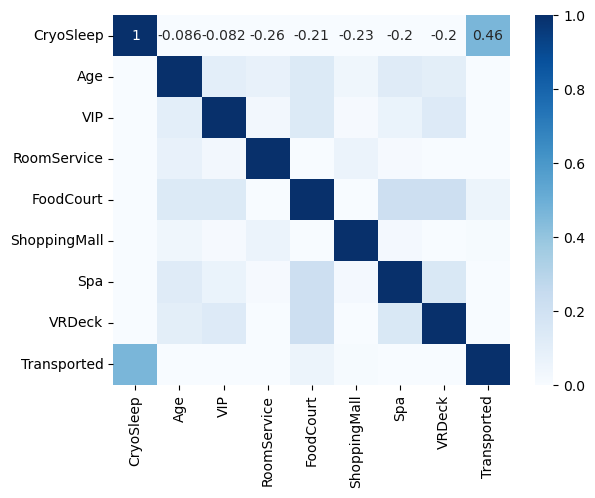

In [14]:
# Create a copy of the DataFrame
combined_df_copy = combined_df.replace({True: 1, False: 0})

# Drop NaN values from the DataFrame
combined_df_copy = combined_df_copy.dropna()

# Create a heatmap of correlations for numerical columns
sns.heatmap(combined_df_copy.select_dtypes(include=np.number).corr(), vmin=0, vmax=1, cmap=plt.cm.Blues, annot=True)

# Display the heatmap
plt.show()


The heatmap above highlights __CryoSleep__ as having the highest correlation among the __Transported__ feature, confirming the observations discussed in Section 2.1. It's noteworthy that generating an SNS plot typically requires numerical values; hence, temporary feature engineering was applied to facilitate this analysis.

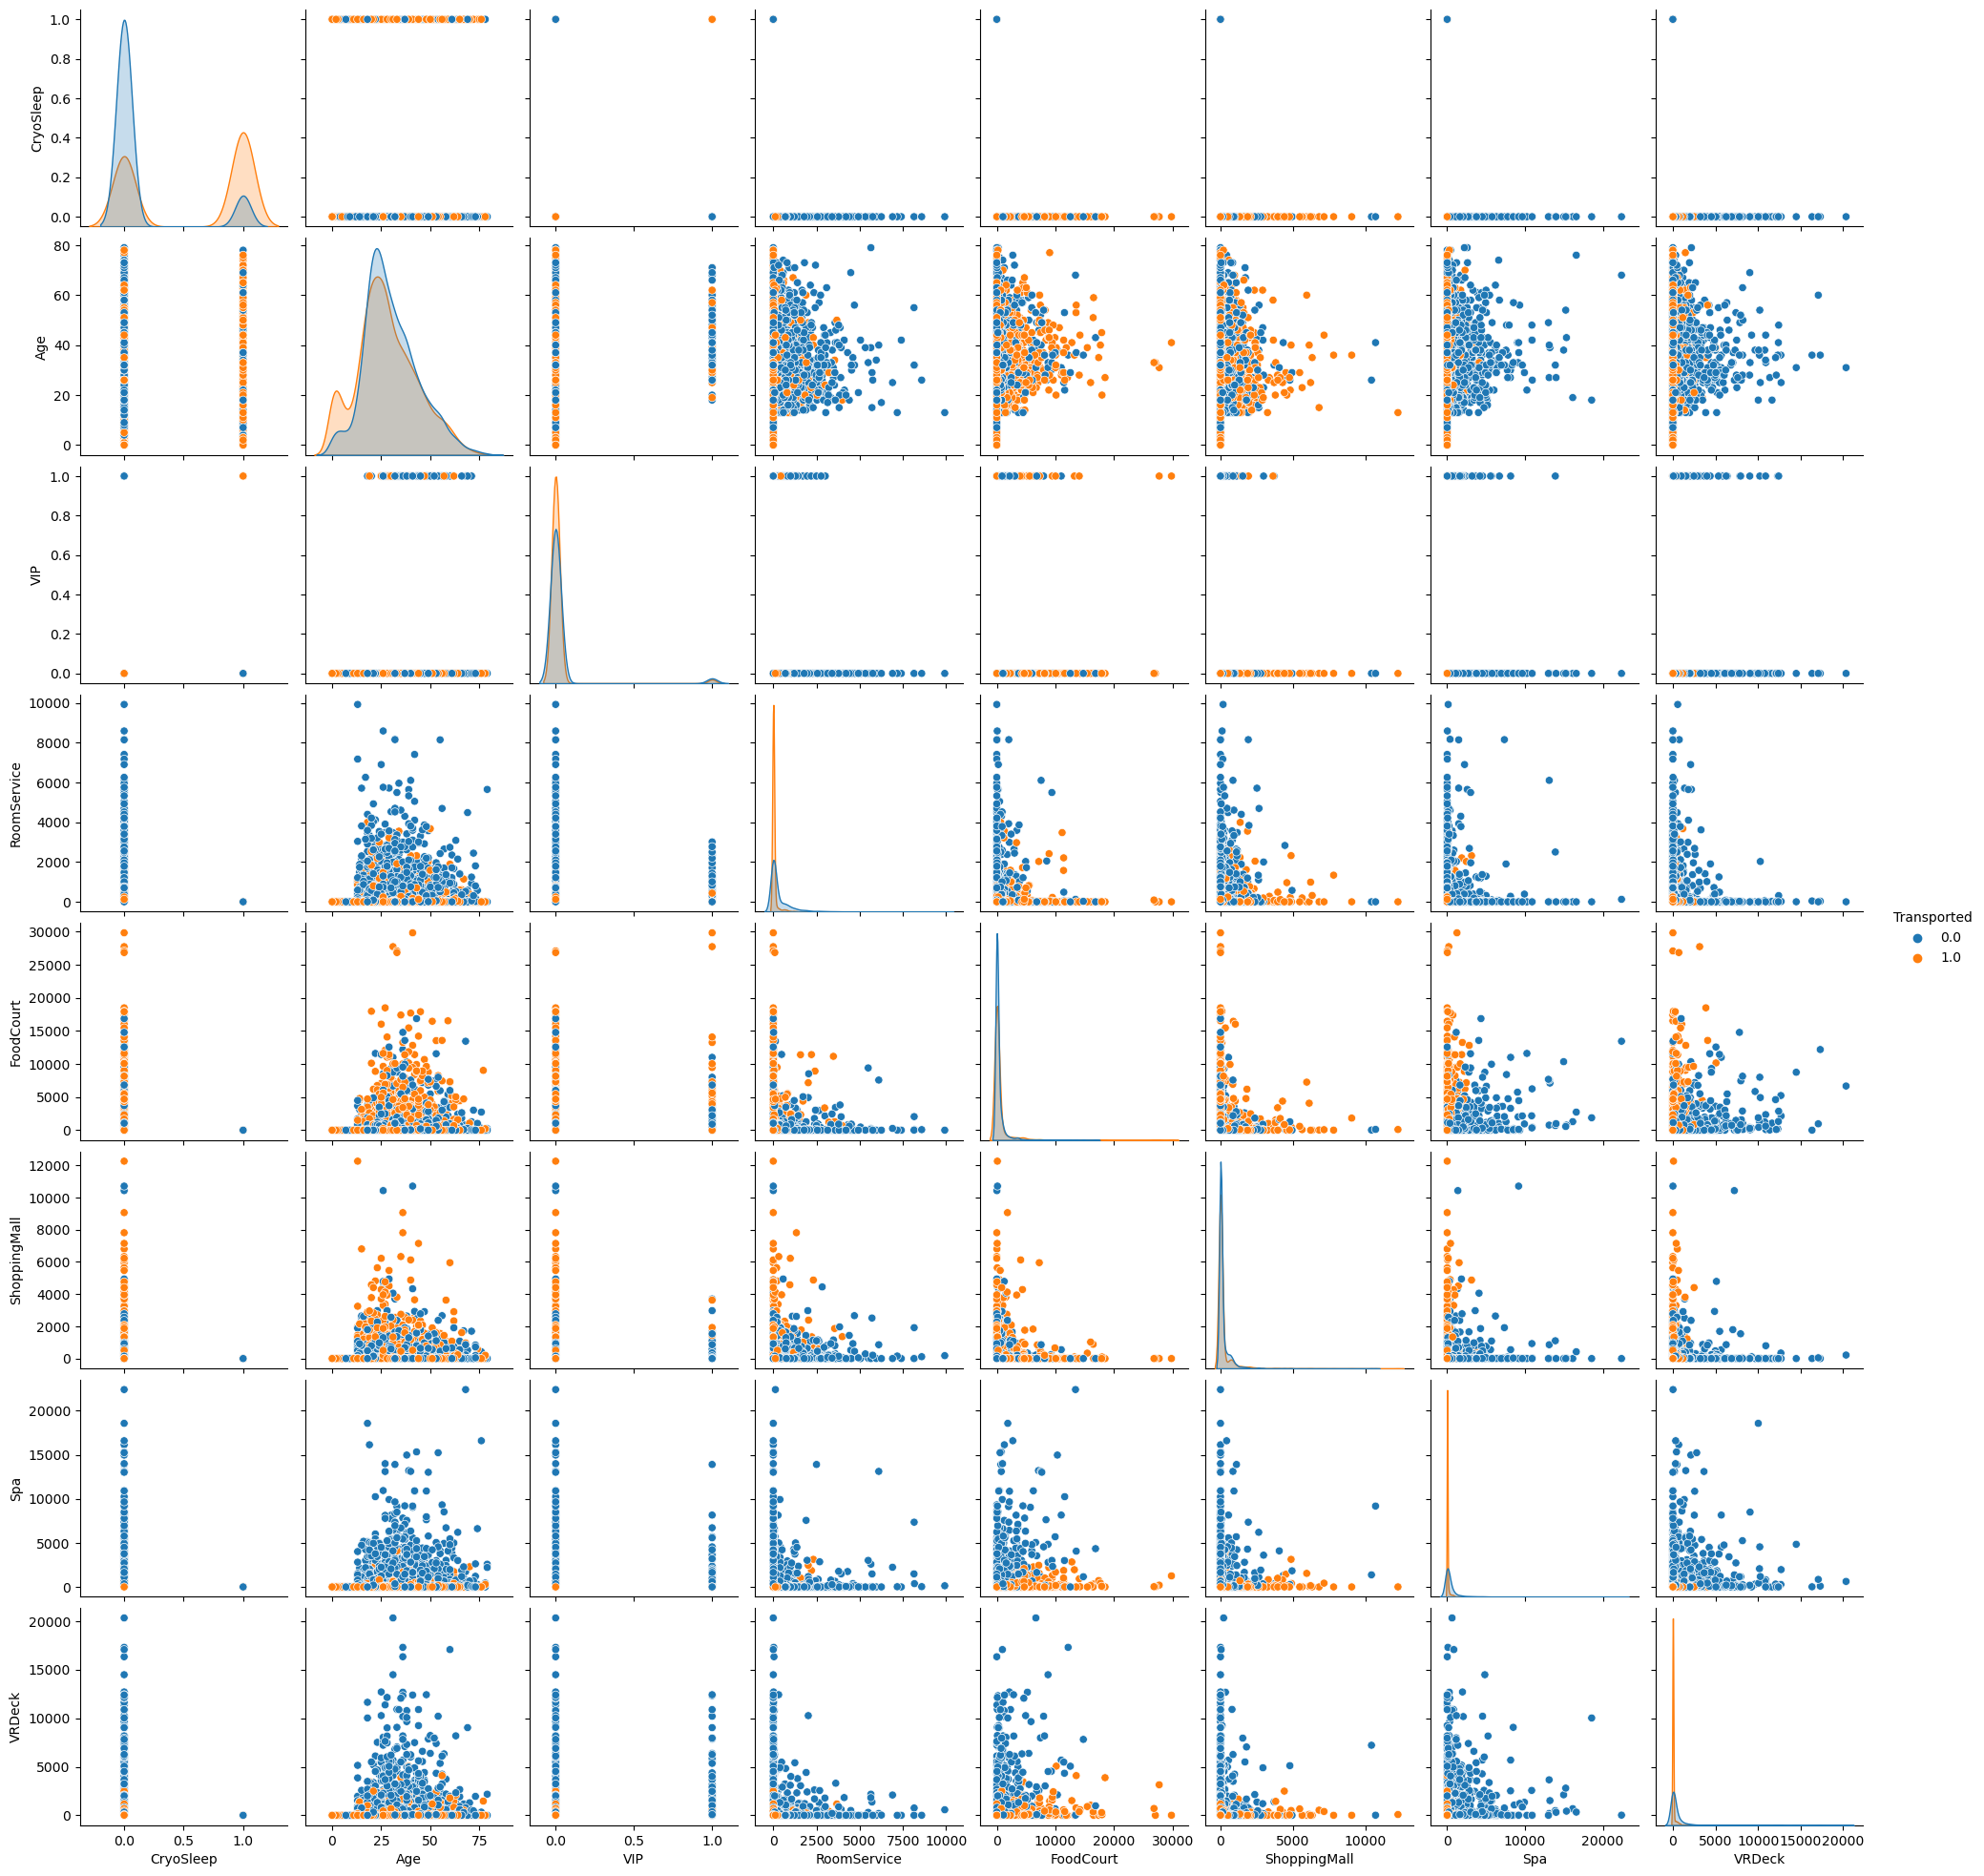

In [15]:
sns.pairplot(combined_df_copy, hue = 'Transported');

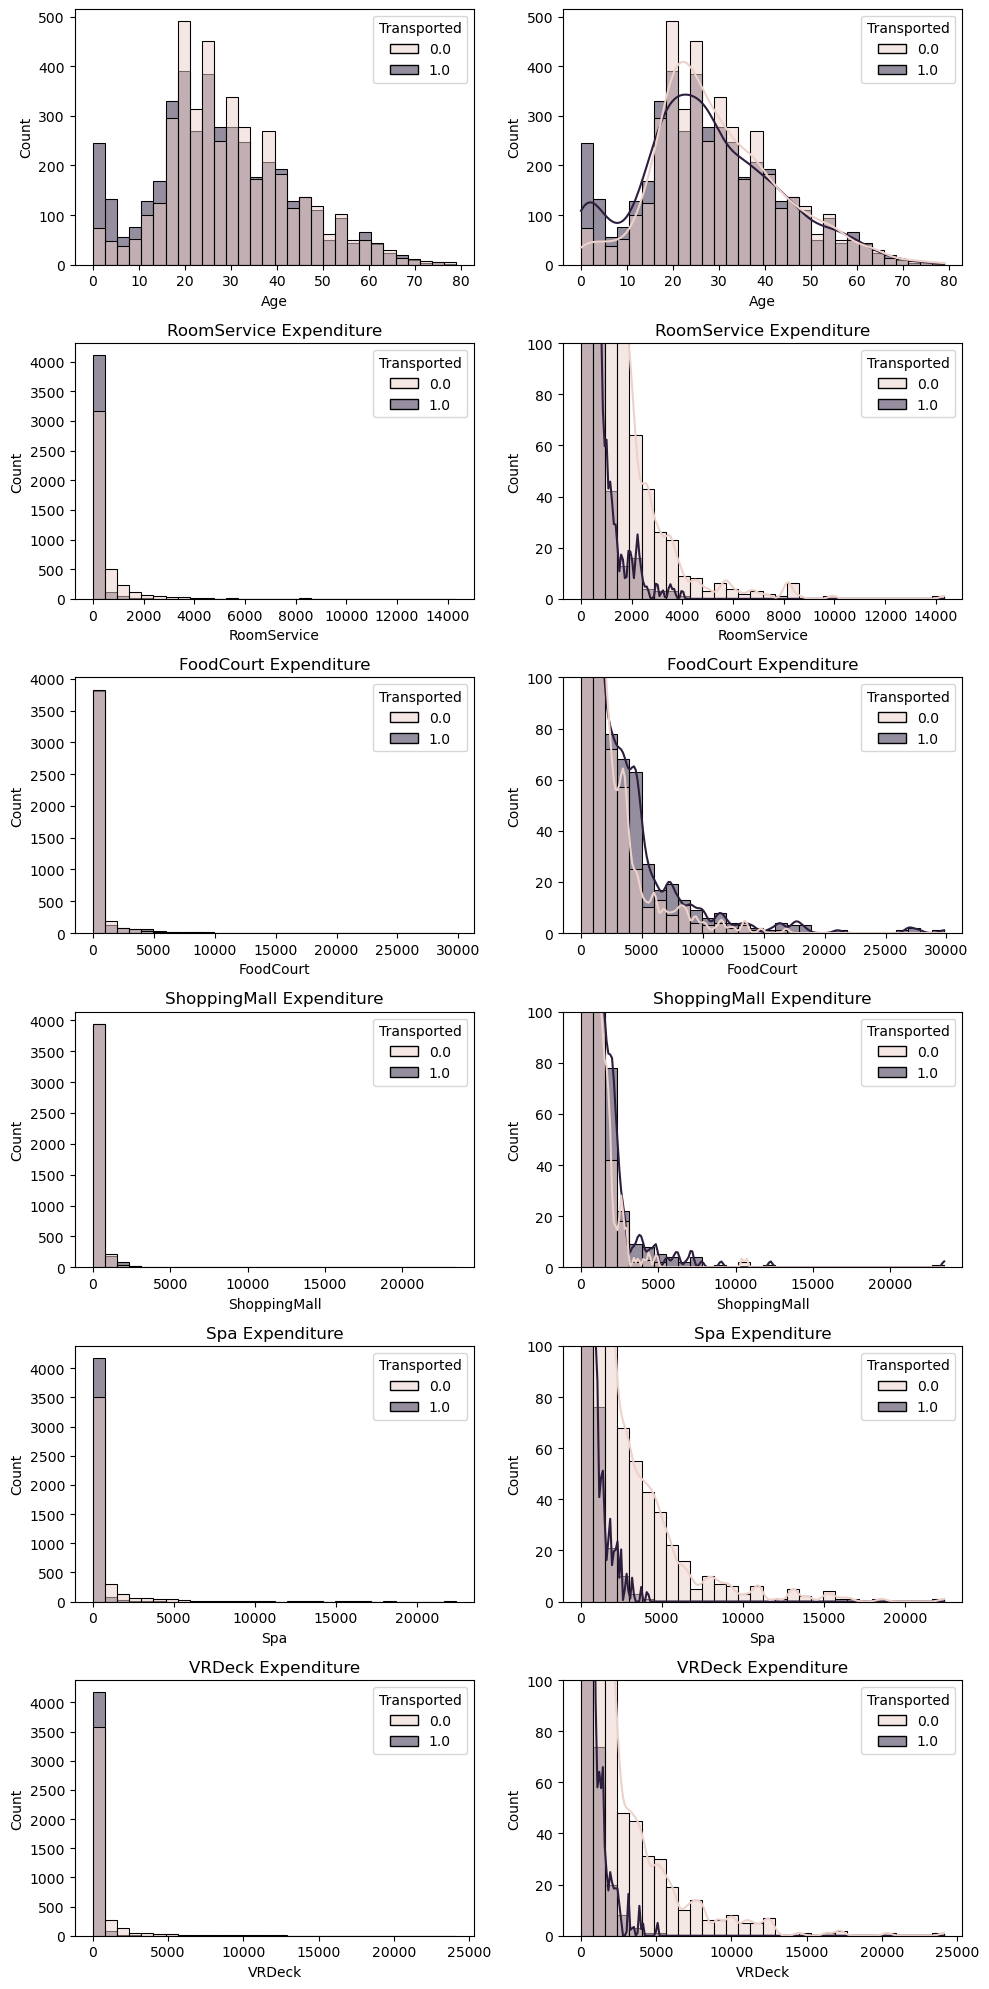

In [16]:
# Numerical features
num_feats=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot numerical features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(num_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    if(i!=0):
        ax.set_title(var_name + " Expenditure")
    
    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    if(i!=0):
        plt.ylim([0,100])
        ax.set_title(var_name + " Expenditure")
fig.tight_layout()  # Improves appearance a bit

plt.show()

Most passengers did not spend money, and those spending less were more likely to be transported. This observation strengthens the relationship between __CryoSleep__ and __Transportation__, as individuals in __CryoSleep__ likely didn't spend. To make it easier for analysing all individial expense features are grouped into a singular expense feature. 

In [17]:
expense_feature = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
combined_df['TotalExpenditure'] = combined_df.loc[:,expense_feature].sum(axis=1)

temp_combined_df['TotalExpenditure'] = temp_combined_df.loc[:,expense_feature].sum(axis=1)
combined_df.head(3)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck             Name  \
0          0.0        0.0           0.0     0.0     0.0  Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0     Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0    Altark Susent   

  Transported  TotalExpenditure  
0       False               0.0  
1        True             736.0  
2       False           10383.0

In [18]:
combined_df.groupby('HomePlanet')['VIP'].mean()

HomePlanet
Earth          0.0
Europa    0.057843
Mars      0.034312
Name: VIP, dtype: object

In [19]:
combined_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: object

In [20]:
combined_df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e          0.61
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: object

In [21]:
combined_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: object

In [22]:
combined_df.groupby('VIP')['TotalExpenditure'].mean()

VIP
False    1358.276510
True     4595.542125
Name: TotalExpenditure, dtype: float64

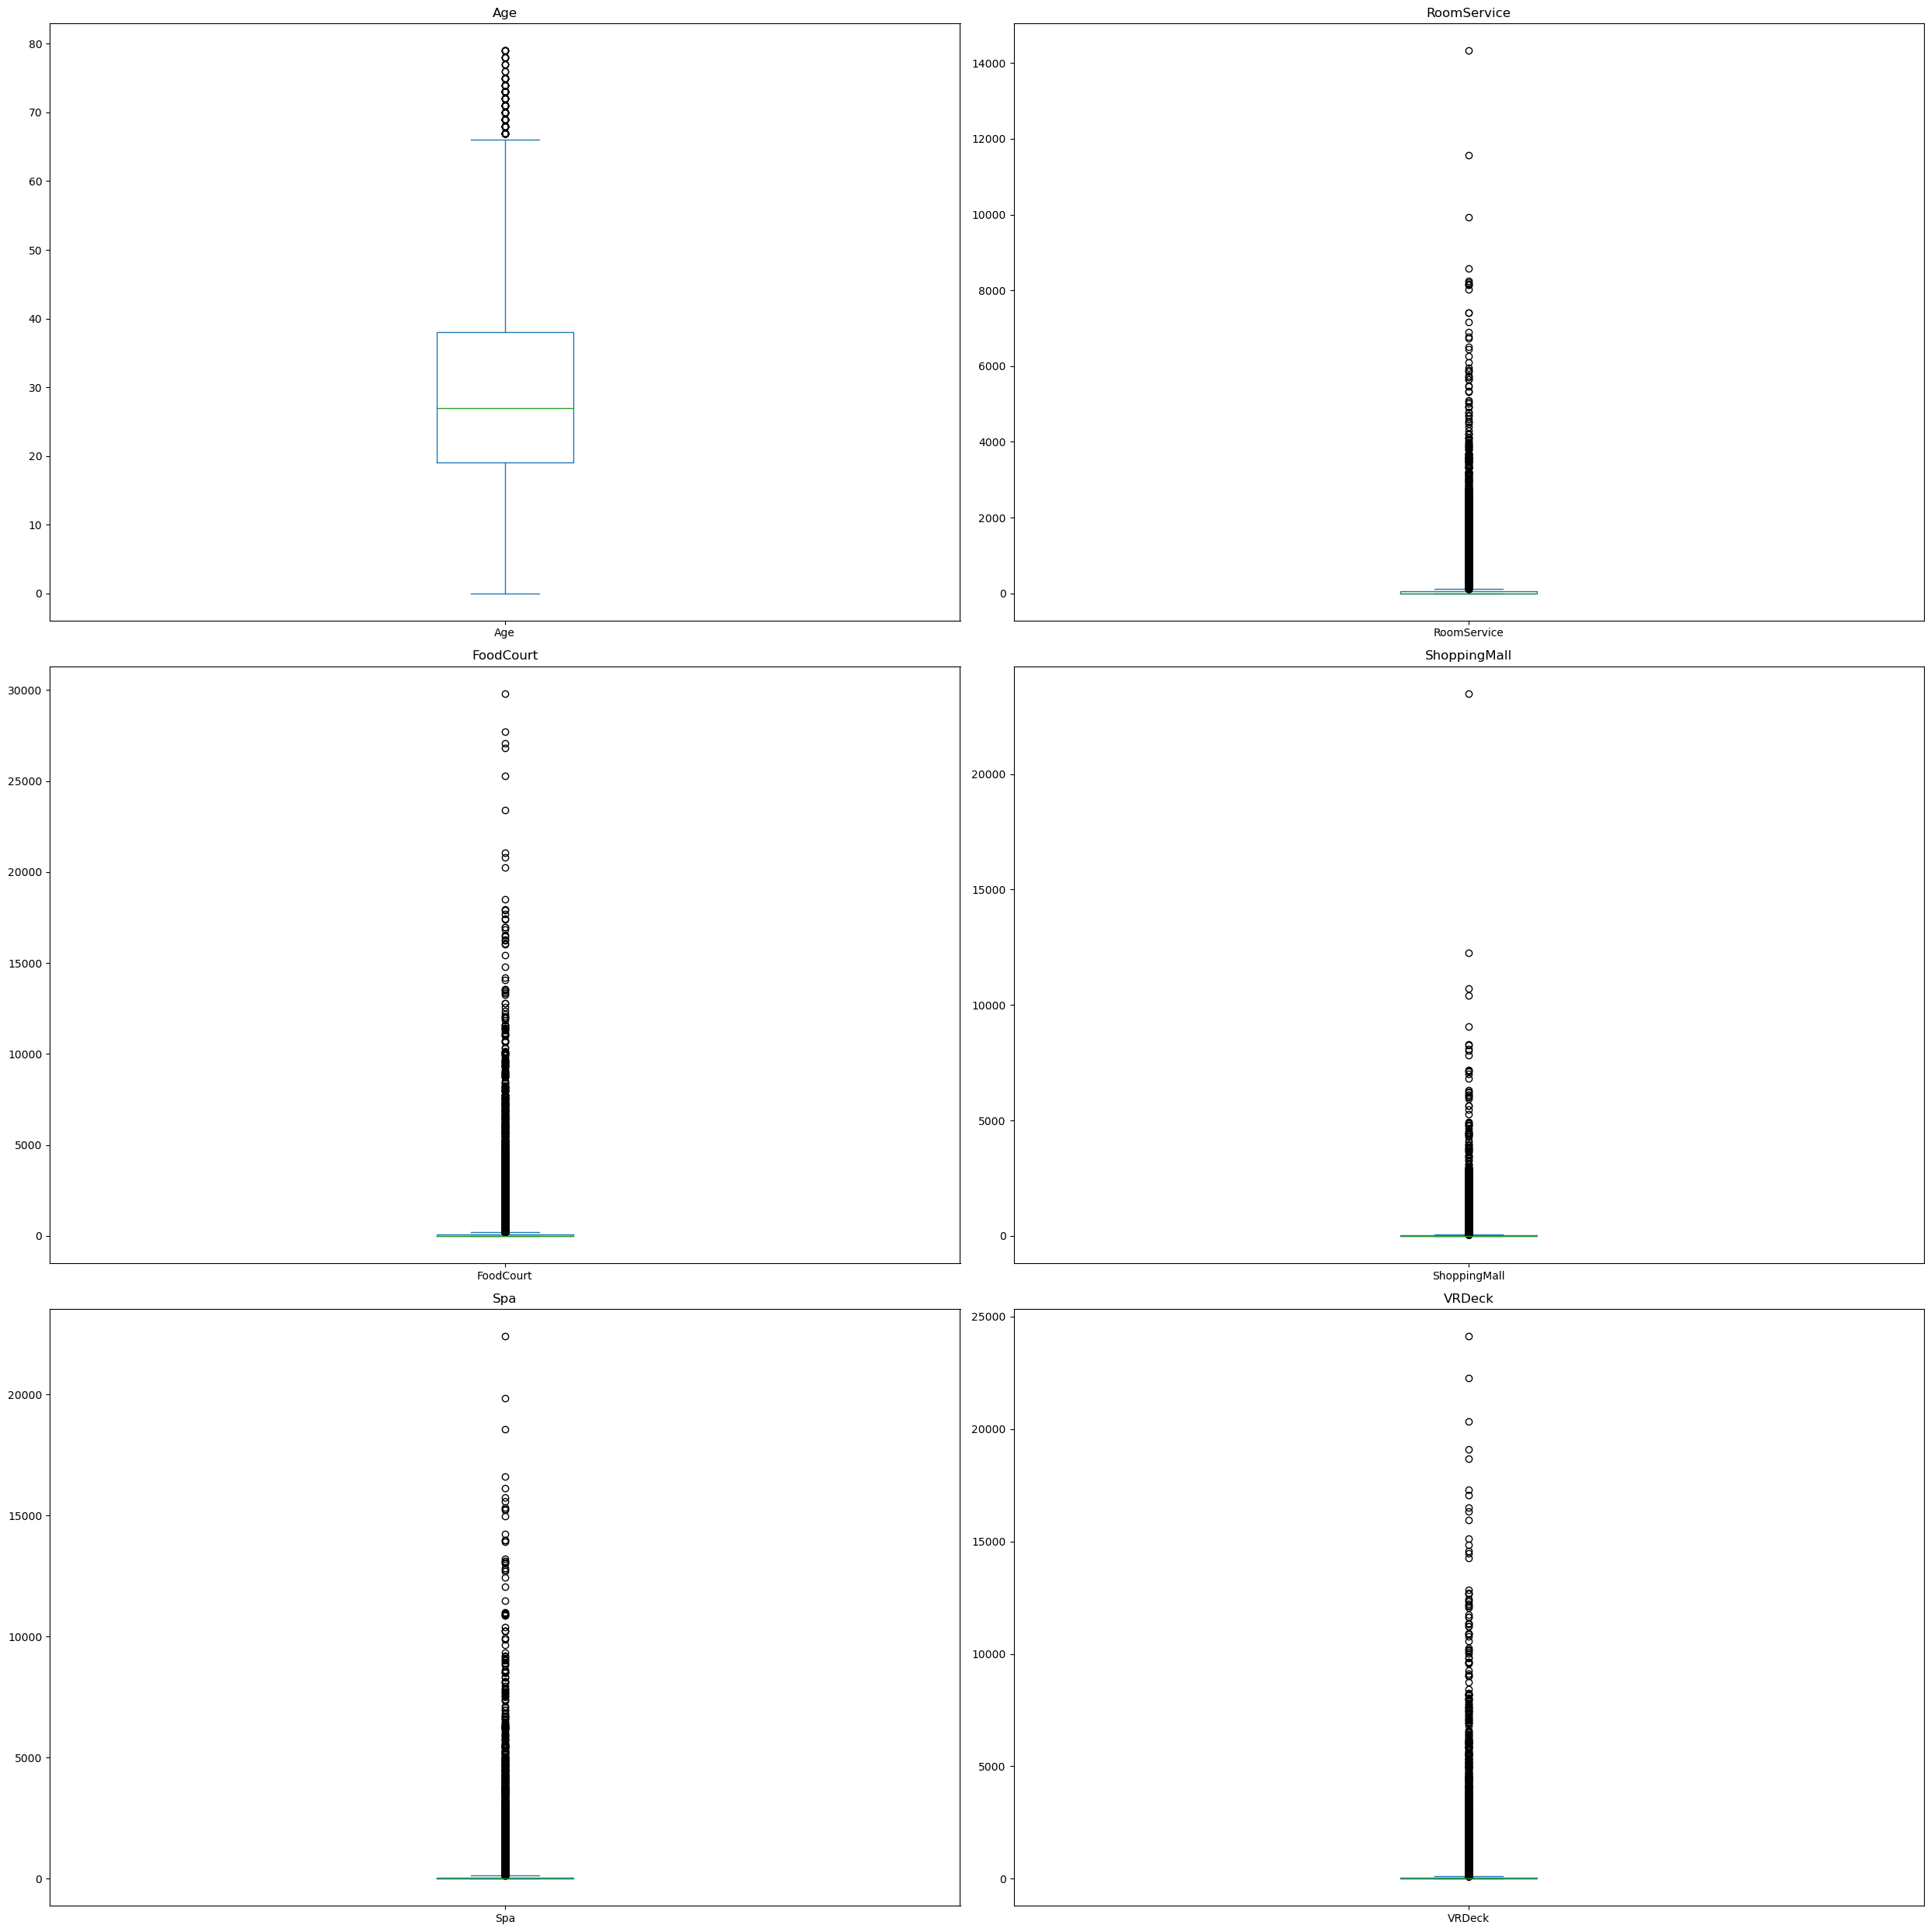

In [23]:
# Display box and wshisker diagrams for each numerical feature
num_variables = len(num_feats)
nrows = num_variables // 2  
ncols = 2  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 25))

for i, var in enumerate(num_feats):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col]  

    combined_df[var].plot(kind='box', ax=ax) 
    ax.set_title(var)


plt.tight_layout()
plt.show()

Outliers are noted above, particularly in expenditure-related features.

## 3. Feature Engineering

Within this section, various techniques are employed to preprocess and engineer features. Beginning with Section 3.1, features are adjusted to ensure alignment with analysis requirements. Subsequently, in Section 3.2, missing data entries are addressed through appropriate imputation methods. Section 3.3 focuses on scaling numerical data to ensure uniformity in magnitudes. Categorical variables are then encoded using one-hot encoding techniques, detailed in Section 3.4. Finally, the dataset is split into training and test sets in Section 3.5 to facilitate effective model training and evaluation. Additionally, strategies for feature selection and multicollinearity mitigation are explored to optimize model performance.

### 3.1 Adjusting Features
#### 3.1.1 Cabins and Passenger IDs


The __PassengerId__ and __Cabin__ locations contain multiple forms of information that can be extracted into additional features. The __Cabin__ data is typically presented in the format _deck/num/side_. Hence, it is proposed to decompose the cabin feature into three separate features. Additionally, the __PassengerId__ conventionally adopts the structure _gggg _ pp_, where _gggg_ denotes the group number and _pp_ represents a passenger's number within a group. By parsing the group numbers from the __PassengerId__, an additional feature can be derived.

In [24]:
combined_df['Group'] = combined_df['PassengerId'].astype(str).str[:4]

counts = combined_df['Group'].value_counts()
combined_df['Group'] = combined_df['Group'].map(counts)

combined_df[['Deck', 'Number', 'Side']] = combined_df['Cabin'].str.split('/', expand=True)

combined_df.head(5)

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  TotalExpenditure  Group Deck Number Side  
0       False               0.0      1    B      0    P  
1        True             736.0      1    F      0    S  
2       False           10383.0      2    A      0    S  
3       False            5176.0      2    A      0    S  
4        True            1091.0      1    F      1    S

#### 3.1.2 Age


Based on the data analysis conducted in Section 2, it is evident that the age range of passengers spans 79 years. This broad spectrum of values in its current numerical state lacks substantial interpretive value. However, this limitation can be mitigated by categorizing the data into age groups, thereby facilitating the identification of trends among different age cohorts. Additionally, the incorporation of an age group feature is anticipated to significantly alleviate model complexity.

By aggregating passengers into distinct age brackets, it becomes feasible to explore the relationship between age groups and pertinent variables such as __Transported__ status and __TotalExpenditure__. This segmentation approach allows for a more nuanced analysis of how age influences both the likelihood of transportation and expenditure patterns.

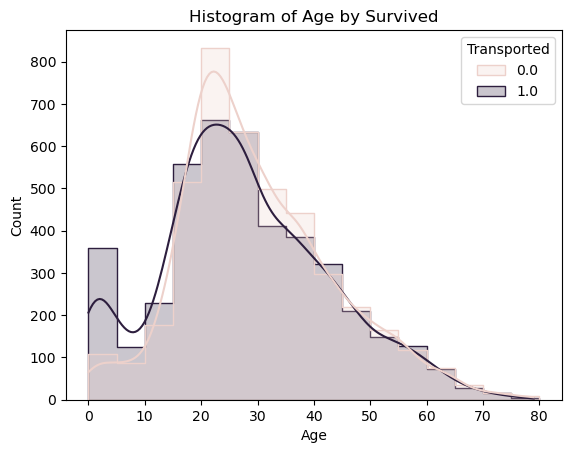

In [25]:
sns.histplot(data=combined_df, x='Age', hue='Transported', element='step', kde=True,binwidth=5)
plt.title('Histogram of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [26]:
combined_df['AgeGroup']=np.nan
combined_df.loc[combined_df['Age']<=12,'AgeGroup']='1'
combined_df.loc[(combined_df['Age']>12) & (combined_df['Age']<18),'AgeGroup']='2'
combined_df.loc[(combined_df['Age']>=18) & (combined_df['Age']<=25),'AgeGroup']='3'
combined_df.loc[(combined_df['Age']>25) & (combined_df['Age']<=30),'AgeGroup']='4'
combined_df.loc[(combined_df['Age']>30) & (combined_df['Age']<=50),'AgeGroup']='5'
combined_df.loc[combined_df['Age']>50,'AgeGroup']='6'

In [27]:
combined_df.groupby('AgeGroup')['Transported'].mean()

AgeGroup
1    0.699752
2    0.553451
3    0.458103
4    0.496272
5    0.479432
6    0.484396
Name: Transported, dtype: object

In [28]:
combined_df.groupby('AgeGroup')['TotalExpenditure'].mean().fillna(0)

AgeGroup
1       0.000000
2     864.158085
3    1109.285911
4    1939.196378
5    1946.321492
6    1941.712022
Name: TotalExpenditure, dtype: float64

From the above relationships, two observations emerge:

1. Individuals belonging to the initial __AgeGroup__ (0-12 years old) exhibit no expenditure.
2. Individuals within the first __AgeGroup__ (0-12 years old) demonstrate the highest likelihood of transportation.

### 3.2 Filling Missing Data Entries


In [29]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group", "AgeGroup"]
transported=['Transported']
combined_df = combined_df[num_cols+cat_cols+transported].copy()

In [30]:
# Print the count of the total number of  missing data entries exluding the target feature
print("Number of missing data entries:", (combined_df.isna().sum().sum() - combined_df["Transported"].isna().sum().sum()))

Number of missing data entries: 3716


When addressing missing data entries, it is imperative to discern the underlying pattern of their absence, categorizing them as Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR) [2]. Such classification is pivotal in determining suitable imputation methods for filling the voids. Upon scrutiny of the data, it becomes apparent that certain missing data may adhere to the MNAR pattern, as inferred from their associations, while the remaining missing values may adhere to the MAR pattern.

The observed relationships are as follows:
- Individuals in __CryoSleep__ exhibit no expenditure.
- There are no __VIP__ passengers hailing from __Earth__.

Leveraging these insights, missing expenditure features for passengers in __CryoSleep__ can be substituted with zero values. Additionally, missing data entries are addressed where either the __VIP__ status is confirmed as __False__ but the __HomePlanet__ is absent, or when the __HomePlanet__ is identified as __Earth__ but the __VIP__ status is unknown. Remaining missing values within these categories are filled using the methods delineated below.

Simply removing rows or columns with missing entries is considered, albeit this approach is deemed unsuitable due to the substantial volume of missing data entries - 3716 in total. Such indiscriminate removal could significantly diminish the available data, thereby undermining the analysis. Consequently, this approach is deemed suboptimal for addressing missing data.

Alternatively, employing a Simple Imputer to replace missing numerical feature data with their mean and categorical feature data with their mode is proposed [2]. While this preserves the total number of entries, it may introduce slight inaccuracies and biases into the data. Notably, as observed from the data analysis in Section 2, numerous outliers are identified within the numerical features. These outliers can distort the data and potentially compromise the accuracy of imputed values. Consequently, this method is preferred for addressing missing entries within categorical features.

Furthermore, consideration is given to the K-Nearest-Neighbors imputation method, which imputes missing data entries with the mean value of the _K_ nearest neighbors [3]. This method is anticipated to offer more accurate imputations compared to the Simple Imputer approach. As such, it is employed for filling missing entries within numerical features.

[2] GfG, “ML Handling Missing Values,” GeeksforGeeks, May 04, 2018. [Link](https://www.geeksforgeeks.org/ml-handling-missing-values/) (Accessed Mar. 31, 2024).

[3] GfG, “Python Imputation using the KNNimputer(),” GeeksforGeeks, Aug. 10, 2020. [Link](https://www.geeksforgeeks.org/python-imputation-using-the-knnimputer/) (Accessed Apr. 02, 2024).

In [31]:
combined_df.isna().sum()

ShoppingMall         306
FoodCourt            289
RoomService          263
Spa                  284
VRDeck               268
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  296
HomePlanet           288
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [32]:
# Function to set expense features to 0 if CryoSleep is True
def adjust_expenses(row):
    if row['CryoSleep'] == True:
        row[expense_feature] = 0
        row['TotalExpenditure'] = 0
    return row

# Apply the function to the DataFrame
combined_df = combined_df.apply(adjust_expenses, axis=1)

# Update the 'CryoSleep' column based on the 'TotalExpenditure' column
combined_df.loc[:,['CryoSleep']]=combined_df.apply(lambda x: True if x.TotalExpenditure == 0 and pd.isna(x.CryoSleep) else x,axis =1)

In [33]:
# Update the 'VIP' column based on the 'HomePlanet' column
combined_df.loc[:,'VIP'] = combined_df.apply(lambda x: False if x.HomePlanet == "Earth" and pd.isna(x.VIP) else x, axis = 1)

# Update the 'HomePlanet' column based on the 'VIP' column
combined_df.loc[:,'HomePlanet'] = combined_df.apply(lambda x: "Earth" if x.VIP == False and pd.isna(x.HomePlanet) else x, axis = 1)

In [34]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            174
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

The utilization of identified relationships between specific features allows for the filling of numerous missing data entries with expected values. This observation aligns with the assertion made earlier regarding certain missing values in the dataset adhering to the MNAR pattern.

In [35]:
num_imp = KNNImputer(n_neighbors=10)
cat_imp = SimpleImputer(strategy='most_frequent')

In [36]:
combined_df[num_cols] = pd.DataFrame(num_imp.fit_transform(combined_df[num_cols]),columns=num_cols)
combined_df[cat_cols] = pd.DataFrame(cat_imp.fit_transform(combined_df[cat_cols]),columns=cat_cols)

In [37]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group","AgeGroup"]
transported=['Transported']
combined_df= combined_df[num_cols+cat_cols+transported].copy()

### 3.3 Scaling Numerical Data

Feature scaling is a crucial aspect of the feature engineering process, involving the standardization of numerical features within a dataset to a specific range. This procedure offers several advantages [4]:

1. Prevents Feature Dominance: Features with larger ranges have a tendency to dominate the model, resulting in biased results. Feature scaling prevents this from occuring.
2. Improves Algorithm Performance: Many algorithms converge faster when features are scaled. This results in better performance.
3. Enhances Numerical Stability: Reduces the range of varying feature scales, thereby reducing the risk of numerical problems.

One common method of scaling features is through the use of StandardScaler. This technique adjusts the mean and standard deviation of each feature to zero and one, respectively, thereby standardizing the distribution of data. Importantly, StandardScaler preserves the overall shape of the data's distribution, ensuring that feature dominance is mitigated during the training process [5].

[4] GfG, “Feature Engineering Scaling, Normalization, and Standardization,” GeeksforGeeks, Jul. 02, 2018. [Link](https://www.geeksforgeeks.org/ml-feature-scaling-part-2/) (Accessed Apr. 01, 2024).

[5] GfG, “What is StandardScaler?,” GeeksforGeeks, Feb. 09, 2024. [Link](https://www.geeksforgeeks.org/what-is-standardscaler/) (Accessed Apr. 01, 2024).
‌‌

In [38]:
combined_df[num_cols] = StandardScaler().fit_transform(combined_df[num_cols])
combined_df

ShoppingMall  FoodCourt  RoomService       Spa    VRDeck  \
0         -0.294298  -0.282930    -0.342323 -0.271011 -0.257879   
1         -0.251502  -0.277190    -0.172472  0.219782 -0.220225   
2         -0.294298   1.997785    -0.275318  5.732045 -0.215946   
3          0.340791   0.535347    -0.342323  2.705038 -0.092712   
4         -0.035811  -0.238285     0.129833  0.234086 -0.256168   
...             ...        ...          ...       ...       ...   
12965     -0.294298  -0.282930    -0.342323 -0.271011 -0.257879   
12966     -0.265196   0.257273    -0.342323 -0.262072 -0.134645   
12967     -0.294298  -0.282930    -0.342323 -0.271011 -0.257879   
12968     -0.294298   1.426330    -0.342323 -0.271011  0.189700   
12969     -0.294298  -0.282930    -0.342323 -0.271011 -0.257879   

       TotalExpenditure       Age CryoSleep Deck Side    VIP HomePlanet  \
0             -0.510541  0.709968     False    B    P  False     Europa   
1             -0.248363 -0.341680     False    F    S  False      Earth   
2              3.188082  2.042056     False    A    S   True     Europa   
3              1.333249  0.289309     False    A    S  False     Europa   
4             -0.121906 -0.902559     False    F    S  False      Earth   
...                 ...       ...       ...  ...  ...    ...        ...   
12965         -0.510541  0.359419      True    G    S  False      Earth   
12966         -0.147910  0.920298     False    F    S  False      Earth   
12967         -0.510541  0.436540      True    D    P  False       Mars   
12968          0.630429  0.534693     False    D    P  False     Europa   
12969         -0.510541  0.990408      True    G    S  False      Earth   

         Destination Group AgeGroup Transported  
0        TRAPPIST-1e     1        5       False  
1        TRAPPIST-1e     1        3        True  
2        TRAPPIST-1e     2        6       False  
3        TRAPPIST-1e     2        5       False  
4        TRAPPIST-1e     1        2        True  
...              ...   ...      ...         ...  
12965    TRAPPIST-1e     2        5         NaN  
12966    TRAPPIST-1e     1        5         NaN  
12967    55 Cancri e     1        5         NaN  
12968    TRAPPIST-1e     1        5         NaN  
12969  PSO J318.5-22     1        5         NaN  

[12970 rows x 16 columns]

### 3.4 One-Hot Encoding


Machine learning algorithms are inherently designed to operate on numerical data [6]. However, categorical features often contain valuable information that needs to be transformed into a numerical format for utilization by these algorithms. One commonly employed technique for this purpose is One Hot Encoding (OHE). 

OHE involves analyzing a categorical feature to identify the number of unique variables or types within it, denoted as _n_. Subsequently, _n_ new binary features are created to represent each unique category, effectively encapsulating the categorical data in a numerical form. This approach effectively overcomes the inherent limitations of machine learning algorithms, which typically require numerical inputs for operation.

[6] Potdar, K., Pardawala, T., and Pai, C. “A Comparative Study of Categorical Variable Encoding Techniques for Neural Network Classifiers,” IJCA, vol. 175, no. 4, pp. 7–9, Oct. 2017, doi: 10.5120/ijca2017915495.

In [39]:
ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False)
temp_train = pd.DataFrame(ohe.fit_transform(combined_df[cat_cols]),columns=ohe.get_feature_names_out())
combined_df = combined_df.drop(cat_cols,axis=1)
combined_df = pd.concat([combined_df,temp_train],axis=1)

### 3.5 Separating Train and Test Data

With the adjustment of feature columns, filling of missing data, and encoding of categorical features completed, the train and test data are now segregated back into their original forms.

In [40]:
train_df = combined_df[combined_df['Transported'].notnull()].copy()
train_df.Transported =train_df.Transported.astype('int')
test_df = combined_df[combined_df['Transported'].isnull()].drop("Transported",axis=1)

X = train_df.drop('Transported',axis=1)
y = train_df["Transported"]
print(X)
print(y)

      ShoppingMall  FoodCourt  RoomService       Spa    VRDeck  \
0        -0.294298  -0.282930    -0.342323 -0.271011 -0.257879   
1        -0.251502  -0.277190    -0.172472  0.219782 -0.220225   
2        -0.294298   1.997785    -0.275318  5.732045 -0.215946   
3         0.340791   0.535347    -0.342323  2.705038 -0.092712   
4        -0.035811  -0.238285     0.129833  0.234086 -0.256168   
...            ...        ...          ...       ...       ...   
8688     -0.294298   4.066117    -0.342323  1.197793 -0.194551   
8689     -0.294298  -0.282930    -0.342323 -0.271011 -0.257879   
8690      2.910248  -0.282930    -0.342323 -0.270118 -0.257879   
8691     -0.294298   0.386105    -0.342323  0.044562  2.510606   
8692     -0.294298   2.707000    -0.145981 -0.271011 -0.247610   

      TotalExpenditure       Age  CryoSleep_False  CryoSleep_True  Deck_A  \
0            -0.510541  0.709968              1.0             0.0     0.0   
1            -0.248363 -0.341680              1.0    

### 3.6 Identifying Correlated Features    

Identifying the correlation between variables is a crucial step in feature selection, as highly correlated features can adversely affect model performance. High correlations between features can lead to several issues [6]:

1.	Redundancy of Information: Certain features may not provide new information to a model as the information can be inferred from another feature. Therefore, it does not improve the predictive power of a model. Removing redundant can assist in preventing overfitting in models, thus resulting in better performance on unseen data. 
2.	Increased Complexity of Models: If highly correlated features are not removed, the dimensionality of data is increased which can result in longer computational times. 
3.	 Interpretation of Data: Having highly correlated features can complicate the interpretability of feature importance, resulting in a lapse in a model’s decision making.

Hence, it is essential to identify and remove correlated features from the dataset. This is achieved by identifying the top ten absolute correlations between different features, excluding correlations between a feature and itself, as this always results in a maximum correlation of 1.0.

[7] M, Sujatha., “Why we have to remove highly correlated features in Machine Learning?,” Medium, Nov. 29, 2023. [Link](https://medium.com/@sujathamudadla1213/why-we-have-to-remove-highly-correlated-features-in-machine-learning-9a8416286f18) (Accessed Apr. 02, 2024).


In [41]:
def get_redundant_pairs(X):
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations !")
print(get_top_abs_correlations(train_df.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations !
CryoSleep_False          CryoSleep_True             1.000000
VIP_False                VIP_True                   1.000000
Side_P                   Side_S                     1.000000
Destination_55 Cancri e  Destination_TRAPPIST-1e    0.783137
FoodCourt                TotalExpenditure           0.743796
HomePlanet_Earth         HomePlanet_Europa          0.633221
Age                      AgeGroup_6                 0.621302
Spa                      TotalExpenditure           0.594728
VRDeck                   TotalExpenditure           0.586090
Deck_G                   HomePlanet_Earth           0.581275
dtype: float64


Among the top ten most correlated features, three pairs exhibit a maximum correlation of 1.0, suggesting redundancy. These pairs include (__CryoSleep_False__ and __CryoSleep_True__, __VIP_False__ and __VIP_True__, __Side_P__ and __Side_S__), indicating duplicate information. Consequently, these redundant features are slated for removal from the dataset.

Furthermore, additional features such as __Destination_TRAPPIST-1e__, __FoodCourt__, __Age__, and __HomePlanet_Earth__ are also marked for elimination due to their high correlations with other features. These step aims to streamline the dataset and enhance model efficiency by reducing unnecessary redundancy and complexity.

In [42]:
drop_list=["Age",'CryoSleep_True','HomePlanet_Earth', 'VIP_False','FoodCourt','Destination_TRAPPIST-1e', "Side_P"]

X=X.drop(drop_list,axis=1)
train_df=test_df.drop(drop_list,axis=1)

X.columns

Index(['ShoppingMall', 'RoomService', 'Spa', 'VRDeck', 'TotalExpenditure',
       'CryoSleep_False', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Side_S', 'VIP_True', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Group_1', 'Group_2', 'Group_3', 'Group_4',
       'Group_5', 'Group_6', 'Group_7', 'Group_8', 'AgeGroup_1', 'AgeGroup_2',
       'AgeGroup_3', 'AgeGroup_4', 'AgeGroup_5', 'AgeGroup_6'],
      dtype='object')

## 4 Models


Cross-validation is a valuable technique used to assess model performance on unseen data by resampling data [8][9]. It helps mitigate overfitting, a common issue where a model performs well on training data but less accurately on unseen data. Various methods of cross-validation can be employed:

1. **Hold Out Cross Validation**: This method involves randomly splitting a dataset into separate training and validation subsets. For instance, 70% of the data can be allocated to training, with the remaining 30% used for validation.

2. **Stratified K-Fold Cross Validation**: In this approach, the dataset is divided into _K_ subsets of equal size, while maintaining the class ratio and distribution of the entire dataset. Each subset, or fold, is used as a validation set iteratively, while the remaining data serves as the training set. The process is repeated until each fold has been utilized for validation, and the average validation score is computed.

3. **Leave-One-Out Cross Validation**: Similar to the generalized _K_-Fold method, but here, _K_ equals the total number of entries in the dataset. Each data entry is used as a test sample while the remaining data is used for training. However, this approach is computationally expensive, especially for large datasets.

The choice of cross-validation method depends on the specific requirements and characteristics of the dataset. To determine the most suitable method, an estimation of accuracy scores for different models is conducted below.

[8] GeeksforGeeks, "Cross Validation in Machine Learning," GeeksforGeeks, [Link](https://www.geeksforgeeks.org/cross-validation-machine-learning/) (Accessed Apr. 02, 2024)

[9] Berrar, D. “Cross Validation”, [Link](https://www.researchgate.net/profile/Daniel-Berrar/publication/324701535_Cross-Validation/links/5cb4209c92851c8d22ec4349/Cross-Validation.pdf) (Accessed Apr. 02, 2024)

#### 4.1 Model Performance Estimations
##### 4.1.1 Hold Out Cross Validation


In [43]:
random_state = 2
classifiers = [SVC(), RandomForestClassifier(), ExtraTreesClassifier(), 
               GradientBoostingClassifier(), CatBoostClassifier(verbose = False),
               XGBClassifier(), LGBMClassifier()]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random_state)

results = {}  

for name, classifier in zip(["SVC", "RandomForest", "ExtraTrees", "GradientBoosting", "CatBoostClassifier", "XGBClassifier", "LGBMClassifier"], classifiers):
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[name] = accuracy 

cv_res_holdout = pd.DataFrame(results, index=['Accuracy'])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2167, number of negative: 2179
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 4346, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498619 -> initscore=-0.005522
[LightGBM] [Info] Start training from score -0.005522


In [44]:
cv_res_holdout

SVC  RandomForest  ExtraTrees  GradientBoosting  \
Accuracy  0.795951       0.78928    0.766966          0.796181   

          CatBoostClassifier  XGBClassifier  LGBMClassifier  
Accuracy            0.806303       0.795491        0.801472

##### 4.1.2 Stratified K-Fold Cross Validation

In [45]:
kfold = StratifiedKFold(n_splits=20, shuffle = True)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
     CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cross_validation_results = []
for classifier in classifiers :
    cross_validation_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cross_validation_mean = []
cross_validation_std = []
for cv_result in cross_validation_results:
    cross_validation_mean.append(cv_result.mean())
    cross_validation_std.append(cv_result.std())

cross_validation_res = pd.DataFrame({"CrossValMeans":cross_validation_mean,"CrossValerrors": cross_validation_std,"Algorithm":["SVC", "RandomForest","ExtraTrees","GradientBoosting", "CatBoostClassifier", "XGBClassifier", "LGBMClassifier"]})

In [46]:
cross_validation_res

CrossValMeans  CrossValerrors           Algorithm
0       0.797074        0.017709                 SVC
1       0.792591        0.017043        RandomForest
2       0.773382        0.014586          ExtraTrees
3       0.798572        0.016666    GradientBoosting
4       0.811797        0.012507  CatBoostClassifier
5       0.803870        0.014201       XGBClassifier
6       0.801902        0.026081      LGBMClassifier

Upon evaluating the estimated cross-validation scores, it is apparent that the stratified K-Fold method performs better than the Hold Out encryption method.

Having identified the K-Fold method as the preferred cross-validation method, different fold sizes (5,10,15,20) were tested and a fold size of 20 yielded the best results.

In [47]:
cv = StratifiedKFold(n_splits=20, shuffle = True)

#### 4.2 Feature Selection using LBGM Classifier


Classifiers in general are algorithms that organise data as being a part of certain groups or "classes", essentially predicting the class(es) taht a datapoint belongs to [12][13] . The Light Gradient Boosting Classifier (LGBM) is a machine learning algorithm that makes use of decision trees for ranking and classification of data, among other tasks [10]. The classifier makes use of techniques such as Gradient-Based One-Side Sampling (GOSS) and Exclusive feature binding (EFB) among other methods to achieve it's ranking [10][11]. GOSS allows for improved training time and optimized memory usage by retaining instances with large gradients during training [10][11]. EFB allows for a faster training process by combining mutually exclusive features to reduce the number  of dimensions of the data [10].

The LGBM Classifier is used here to determine the 15 most important features of the dataset. This allows for the ranking of features and the removal of unimportant features- leading to improved performance and easier understanding of the underlying processes upon which the model operates [copilot]. Using the LGBM classifier has various advantages:

1. Improves accuracy (when compared to other boosting algorithms) and handles overfitting well in small datasets [14].

2. Training speeds are increased [15].

3. Memory usage is decreased [14].

To proceed, the training data is split into separate training and validation sets. The training set is utilized to train the model and determine optimal parameters, while the validation set assesses the model's performance on unseen data, simulating real-world scenarios.

The top 15 features identified will are employed for model training.

    

[10] V. Chugh, “LGBMClassifier: A Getting Started Guide,” KDnuggets, Jul. 29, 2023. [Link](https://www.kdnuggets.com/2023/07/lgbmclassifier-gettingstarted-guide.html) (Accessed Apr. 02, 2024). 

[11] GfG, “LightGBM (Light Gradient Boosting Machine),” GeeksforGeeks, Jul. 15, 2020. [Link](https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/) (Accessed Apr. 02, 2024).

[12] T. G. Mesevage, “Machine Learning Classifiers - The Algorithms & How They Work,” MonkeyLearn Blog, Dec. 14, 2020. [Link](https://monkeylearn.com/blog/what-is-a-classifier/) (Accessed Apr. 02, 2024).

[13] S. Asiri, “Classification in Machine Learning: An Introduction | Built In,” builtin.com, Nov. 15, 2022. [Link](https://builtin.com/machine-learning/classification-machine-learning) (Accessed Apr. 02, 2024).

[14] A. Mondal, “LightGBM in Python | Complete guide on how to Use LightGBM in Python,” Analytics Vidhya, Aug. 18, 2021. [Link](https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/) (Accessed Apr. 02, 2024).

[15] T. Aggarwal, “Empower Your Machine Learning Models with LightGBM: A Step-by-Step Guide,” Medium, Aug. 07, 2023. [Link](https://python.plainenglish.io/empower-your-machine-learning-models-with-lightgbm-a-step-by-step-guide-622b3879d34a) (Accessed Apr. 02, 2024).

In [48]:
%%capture
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
model = LGBMClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="accuracy", n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:15]]  # 15 Most important feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

In [49]:
top_features

Index(['Spa', 'VRDeck', 'RoomService', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_F', 'Side_S', 'ShoppingMall', 'Deck_E', 'Deck_C', 'Deck_B',
       'Destination_55 Cancri e', 'HomePlanet_Mars', 'AgeGroup_3', 'Group_1'],
      dtype='object')

In [50]:
# Let's move on with the top 15 features
X_FeatureSelection_LGM = X[top_features]
test_FeatureSelection_LGM = test_df[top_features]

#### 4.3 Feature Selection using RFE

In [51]:
%%capture
# Create the RFE object and rank each pixel
# Initialize LightGBM classifier
clf = LGBMClassifier()
# Initialize RFE with LightGBM as the estimator
rfe = RFE(estimator=clf, n_features_to_select=15)
rfe.fit(X, y)
column_names = X.columns
selected_column_names = column_names[rfe.support_]
selected_column_names

Recursive Feature Elimination (RFE) represents a feature selection algorithm aimed at identifying the most significant features contributing to the predictive variable or output of a model [16][17][18]. While sharing a similar objective with the LGBM Classifier, RFE employs a distinct methodology. RFE iteratively eliminates features from the dataset, utilizing the remaining features to construct a model whose performance is then assessed [16][17]. This iterative process continues, generating progressively smaller feature sets until an optimal feature selection is achieved [16][17]. Similar to LGBM, RFE offers several advantages:

1. Enhanced efficiency achieved through reduced complexity by discarding less important features [16].

2. Improved accuracy attained by focusing on the most influential features [17].

3. Mitigation of overfitting by eliminating less relevant features [16].

In this particular implementation, the top 15 features yielding the best model performance were retained.

[16] J. Brownlee, “Recursive Feature Elimination (RFE) for Feature Selection in Python,” Machine Learning Mastery, May 24, 2020. [Link](https://machinelearningmastery.com/rfe-feature-selection-in-python/) (Accessed Apr. 02, 2024).

[17] Avcontentteam, “Recursive Feature Elimination: Working, Advantages & Examples,” Analytics Vidhya, May 17, 2023. [Link](https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/) (Accessed Apr. 02, 2024).

[18] scikit-learn, “sklearn.feature_selection.RFE,” , 2024, [Link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) (Accessed Apr. 02, 2024).
‌

#### 4.4 15 Parameter Justification


[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number o

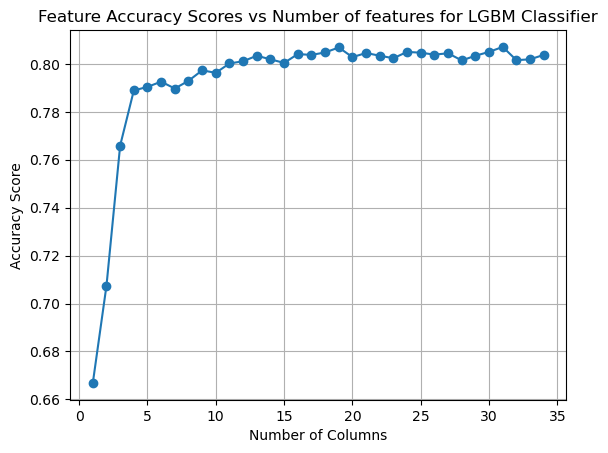

In [53]:
num_col = X_train.columns.shape[0];
feature_accuracy_scores = [];
for i in range(1,num_col+1):
    top_features = X.columns[sorted_indices[:i]];  # 15 Most important feature
    top_importances = result.importances_mean[sorted_indices[:i]];
    model = LGBMClassifier();
    scores = cross_val_score(model, X[top_features], y, cv=StratifiedKFold(n_splits=10, shuffle = True), scoring='accuracy');
    feature_accuracy_scores.append(scores.mean());

#Plotting the graph
plt.plot(range(1, num_col+1), feature_accuracy_scores, marker='o')
plt.title('Feature Accuracy Scores vs Number of features for LGBM Classifier')
plt.xlabel('Number of Columns')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573


[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Inf

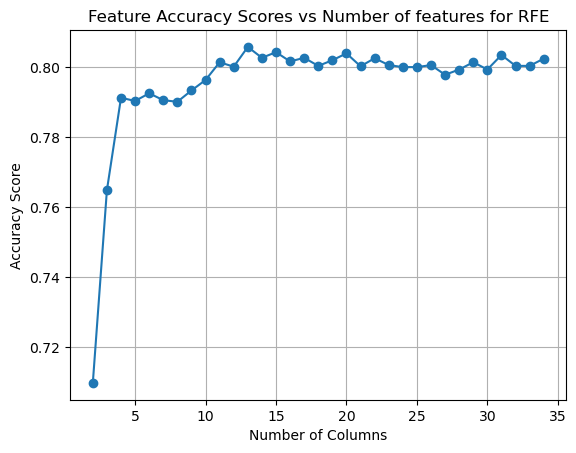

In [54]:
num_col = X_train.columns.shape[0];
feature_accuracy_scores = [];
for i in range(2,num_col+1):                       #start with 2 because RFE needs at least 2 features
    top_features = X.columns[sorted_indices[:i]];  # 15 Most important feature
    top_importances = result.importances_mean[sorted_indices[:i]];
    # Create the RFE object and rank each pixel
    # Initialize LightGBM classifier
    clf = LGBMClassifier()
    # Initialize RFE with LightGBM as the estimator
    rfe = RFE(estimator=clf, n_features_to_select=15)
    model = rfe;
    scores = cross_val_score(model, X[top_features], y, cv=StratifiedKFold(n_splits=10, shuffle = True), scoring='accuracy');
    feature_accuracy_scores.append(scores.mean());

#Plotting the graph
plt.plot(range(2, num_col+1), feature_accuracy_scores, marker='o')
plt.title('Feature Accuracy Scores vs Number of features for RFE')
plt.xlabel('Number of Columns')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

The accuracy score for the LGBM classifier does not change significantly when using more than 11 columns, while the accuracy score for RFE does not change significantly after 14 features. The accuracy score when using LGBM classifier is generally slightly higher than that of RFE when using more than 14 features. Therfore, the top 15 features when using the LGBM classifier have been selected and are used for the remainder of the project. Choosing to use less features is appropriate, as it reduces computational complexity, and does not cause a notable decrease in accuracy.

## 5. Model Tuning

Model tuning, also known as hyperparameter optimization, involves finding the optimal combination of parameters to control the learning process of a machine learning model [19]. These hyperparameters play a crucial role in determining the performance of the model [19]. Unlike model parameters, which are learned from the training data, hyperparameters are predefined settings that are not derived from the data itself [19].

Three hyperparameter optimization strategies will be examined: Grid Search, Random Search, and Optuna.

* Section 5.1: Grid Search

This method systematically evaluates combinations from a predefined set of hyperparameters. It’s exhaustive in nature, ensuring that no potential solution within the grid is overlooked [21][20].

* Section 5.2: Optuna

Optuna employs a more sophisticated approach, leveraging Bayesian optimization techniques to navigate the hyperparameter space efficiently. This allows for a broader and more targeted search compared to Grid Search [21][20].

* Section 5.3: Random Search

Random Search offers a probabilistic exploration by randomly selecting hyperparameter combinations. This method can often uncover high-performing solutions more quickly than Grid Search, especially in large hyperparameter spaces [21][20].

The comparison of the performance of these two hyperparameter optimization methods is conducted in Section 5.4, providing insights into their effectiveness in improving model performance.

[19] K. Li, “Model tuning and what is it ?(using python),” Medium, [Link](https://medium.com/@kelfun5354/model-tuning-and-what-is-it-using-python-630e388e224a) (Accessed Apr. 1, 2024). 

[20] D. David, “Hyperparameter optimization techniques to improve your machine learning model’s performance,” freeCodeCamp.org, [Link](https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/) (Accessed Apr. 4, 2024). 

[21] M. Charles, “Improving model performance: Tips and tricks for hyperparameter tuning,” Medium, [Link](https://medium.com/@cmugendi3/improving-model-performance-tips-and-tricks-for-hyperparameter-tuning-a6d63c931457) (Accessed Apr. 4, 2024). 

### 5.1 Model Tuning using GridSearch

GridSearch is a hyperparameter optimization method that is used in machine learning to find the optimal combination of hyperparameters [71]. It utilizes an exhaustive search through manually specified hyperparameter space [71]. utilizes a cross-validation or another evaluation methods for evaluating the hyperparameters. This method is powerful because it guarantees finding the most optimal solution within the defined grid, although it can be time-consuming for large hyperparameter spaces.

In [55]:
gridSearch_modelsAccuracy = []


#### 5.1.1 Logistic Regression

The logistic regression model utilizes a statistical method for binary classification where the sigmoid function is utilized [22]. This means that it predit the probability that a specific data entry either belongs to one of the two categories [22][23]. This probability is calculated by applying a logistic function to a linear equation that will either output a value between 0 and 1 which is the probability of a date entry belonging to one of the two categories [23].

Some advantages and disadvantages of the logistic regression is outlined below [24]: 

Advantages 
* The logistic regression is simple and straightforward to understand making it a good starting point for classification tasks. 
* The model is less computationally complex when compared to other models. Therefore, faster to train. 
* The models coefficients can provide insight into the importance of each feature. 
* The model can be expanded to multi-class classification problems. 

Disadvantages
* The model assumes there is a lienar relationship between the independent and the log odds of the dependent variable. 
* The model is limited due to data not always being linearly sepertable. 
* The model is unable to capture complex relationships between data. 

The logistic regression may be a computationally inexpensive and simple model to implement but as the data has been viewed earlier in the notebook. There is not a clear linear relationship between the data causing it to most likely perform purely. 

In the implementation below the hyperparameters that are focused on are outlined below [25][26]: 
1. "C": This represents teh inverse of the regularization strength which means it can help prevent overfitting as a smaller value for "C" will prevent the overfitting by penalizing the larger values in the models parameters. The larger values of "C" ensure that more weight is giving to the training data causing a possibly more complex model to be developed. 
2. "penality": This refers to the regulariztion applied to the model so for "l1" it is called the Lasso regulariztion which reduces the number of parameters by causing certain coefficients to become zero. "l2" is the Ridge regularization will reduce the number of coefficients going to zero and rather cause the coefficients to be smaller values instead. 

[22] GeeksforGeeks, "Understanding Logistic Regression," GeeksforGeeks. [Link](https://www.geeksforgeeks.org/understanding-logistic-regression/) (Accessed: Apr. 4, 2024).

[23] Towards Data Science, "Logistic Regression Explained," Towards Data Science. [Link](https://towardsdatascience.com/logistic-regression-explained-ef1d816ea85a) (Accessed: Apr. 4, 2024).

[24] OpenGenus IQ, "Advantages and Disadvantages of Logistic Regression," OpenGenus IQ. [Link](https://iq.opengenus.org/advantages-and-disadvantages-of-logistic-regression/) (Accessed: Apr. 4, 2024).

[25] Medium, "Do I need to tune logistic regression hyperparameters?," Medium. [Link](https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69) (Accessed: Apr. 4, 2024).

[26] scikit-learn, "Linear Models (scikit-learn Documentation)," scikit-learn. [Link](https://scikit-learn.org/dev/modules/linear_model.html) (Accessed: Apr. 4, 2024).

In [56]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
X_train, X_test, y_train, y_test = train_test_split(X_FeatureSelection_LGM, y, test_size=0.2, random_state=42   )
lr = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=cv, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_lr = grid_search.best_estimator_
accuracy = best_lr.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'C': 1, 'penalty': 'l1'}
Test Accuracy: 0.7855


#### 5.1.2 Random Forest Classifier

In [59]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, n_jobs=-1 , scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.7861


The Random Forest Classifier operates by constructing multiple decision trees, each utilizing a random subset of features from the dataset [27][28]. Prediction is made by aggregating the results of all trees through voting in classification tasks or averaging for regression tasks [28]. Notably, this method demonstrates several advantageous features [28]:

1. High predictive accuracy
2. Resistance to overfitting
3. Ability to handle large datasets
4. Improved speed through parallelization

In the implementation, the Random Forest Classifier was optimized using grid search, considering four key hyperparameters [29]:

1. Number of trees to be created (_n_estimators_)
2. Maximum depth of the trees (_max_depth_)
3. Minimum number of samples required to split an internal node (_min_samples_split_)
4. Minimum number of samples required to be at a leaf node (_min_samples_leaf_)

Additionally, 5-fold cross-validation was employed, and _n_jobs_ was set to _-1_ to utilize all available CPUs for computation [k]. The optimal hyperparameters determined through this process were _n_estimators_ of 200, _max_depth_ of 20, _min_samples_split_ of 2, and _min_samples_leaf_ of 2.

[27] M. Chaudhary, “Random Forest Algorithm - How It Works and Why It Is So Effective,” [Link](https://www.turing.com/kb/random-forest-algorithm) (Accessed: Apr. 4, 2024).

[28] GfG, “Random Forest Algorithm in Machine Learning,” GeeksforGeeks, Feb. 22, 2024. [Link](https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/) (Accessed: Apr. 4, 2024).

[29] Scikit-learn, “sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation,” 2018. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (Accessed: Apr. 4, 2024).

#### 5.1.3 Naive Bayes 

##### 5.1.3.1 Gaussian Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
# create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=cv)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_gnb = grid_search.best_estimator_
predictions = best_gnb.predict(X_test)

accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Best parameters: {'var_smoothing': 3.511191734215127e-05}
Test Accuracy: 0.7108


Naive Bayes Classification methods are grounded in probability theory, specifically Bayes' Theorem [30]. Unlike other methods focusing on feature importance, Naive Bayes Classifiers aim to understand the distribution of inputs across classes [30][31]. They make a fundamental assumption that all features are independent of each other [32].

Gaussian Naive Bayes (GNB) is a variant of Naive Bayes that assumes features follow a Gaussian Distribution [32][33]. During operation, GNB calculates the probability of an instance belonging to each class, selecting the class with the highest probability as the prediction [33]. It excels in both binary and multi-class classification, particularly when the assumption of feature independence holds true [31]. GNB is advantageous for handling datasets with numerous features, as it doesn't suffer from dimensionality issues.

The parameter that can be adjusted in GNB is _var_smoothing_, which accommodates data not conforming to the Gaussian Distribution [34]. A logarithmic scale ranging from 10^0 to 10^-9 was explored for _var_smoothing_, yielding the optimal value of 0.0006579332246575676. Similar to previous models, 5-fold cross-validation was employed [34].

[30] N. Kumar, “Naive Bayes Classifiers - GeeksforGeeks,” GeeksforGeeks, Jan. 14, 2019. [Link](https://www.geeksforgeeks.org/naive-bayes-classifiers/ (Accessed Apr. 02, 2024).

[31] IBM, “What Are Naïve Bayes Classifiers? | IBM,” www.ibm.com. https://www.ibm.com/topics/naive-bayes#:~:text=Na%C3%AFve%20Bayes%20is%20part%20of) (Accessed Apr. 02, 2024).

[32] C. Martins, “Gaussian Naive Bayes Explained With Scikit-Learn | Built In,” builtin.com, Nov. 02, 2023. [Link](https://builtin.com/artificial-intelligence/gaussian-naive-bayes) (Accessed Apr. 02, 2024).

[33] GfG, “Gaussian Naive Bayes,” GeeksforGeeks, Nov. 13, 2023. [Link](https://www.geeksforgeeks.org/gaussian-naive-bayes/) (Accessed Apr. 02, 2024).

[34] Scikit-learn, “sklearn.naive_bayes.GaussianNB — scikit-learn 0.22.1 documentation,” scikit-learn.org. [Link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) (Accessed Apr. 02, 2024).

[35] K. Jain, “How to Improve Naive Bayes?,” Analytics Vidhya, Apr. 03, 2021. [Link](https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba) (Accessed Apr. 02, 2024).

##### 5.1.3.2 Bernoulli Naive Bayes


In [115]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Additive (Laplace/Lidstone) smoothing parameter
    'binarize': [0.0, 0.5, 1.0],             # Threshold for binarizing of sample features
    'fit_prior': [True, False]               # Whether to learn class prior probabilities or not
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=cv,return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_bnb = grid_search.best_estimator_
predictions = best_bnb.predict(X_test)

# Calculate the accuracy
accuracy = best_bnb.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Best parameters: {'alpha': 0.01, 'binarize': 0.0, 'fit_prior': False}
Test Accuracy: 0.7435


The Bernoulli Naive Bayes (BNB) method operates similarly to Gaussian Naive Bayes but assumes that all features are binary, making predictions based on the Bernoulli Distribution. All other assumptions and methods of GNB apply to BNB as well [36][37].

Various hyperparameters were considered for tuning:

1. Additive smoothing (_alpha_)
2. The threshold for mapping features to booleans (_binarize_)
3. Whether or not to consider prior probabilities of the class (_fit_prior_)

After hyperparameter tuning using 5-fold cross-validation, the optimal parameters were found to be _alpha_ of 0.01, _binarize_ of 0.0, and _fit_prior_ set to true. Notably, the test accuracy of the BNB method was found to be superior to that of the GNB method.

[36] GfG, “Bernoulli Naive Bayes,” GeeksforGeeks, Oct. 25, 2023. [Link](https://www.geeksforgeeks.org/bernoulli-naive-bayes/) (Accessed Apr. 02, 2024).

[37] N. Mutha, “Bernoulli Naive Bayes,” OpenGenus IQ: Learn Computer Science, May 30, 2020. [Link](https://iq.opengenus.org/bernoulli-naive-bayes/) (Accessed Apr. 02, 2024).

#### 5.1.4 XGBoostClassifier

The XGBoostClassifier is an advanced implementation of the gradient boosting algorithm for decision trees [38]. It works by creating a number of decision trees in a sequential manner such that each tree is able to correct the errors of the previous one [38]. This correction forces the model to aim at improving performance. 

Some advantages and disadvantages of the XGBoostClassifier are outlined below [38]: 

Advantages
* The XGBoostClassifier tends to produce better results than other models. 
* The model is optimized for speed and performance. This is done by utilizing paralle processing to train models. 
* The model can handle missing data without requiring the use of an imputater. 
* It utilizes both the L1 and L2 regularization mentioned in logistic regression to prevent overfitting. 
* Is capable of handling a larger dataset and allows for custom optimization and evaluation criteria. 

Disadvantages
* The model may require tuning to achieve good results 
* If the model is not configured correctly it can lead to overfitting 
* It can be resource intensive when used with large datasets.

In the implementation below the hyperameters that are explored will be explained below [39][40].
1. "n_estimators": This defines the number of tress in the models forest. The more trees that are added can improve the ability of the mode learning from the data but can eventually lead to overfitting 
2. "max_depth": This parameter sets the maximum depth of the each tree. The deeper the trees the more complex data can be intepreted but it can also lead to overfitting. 
3. "min_samples_split": This parameter is the minimum number of samples required to split an internal node causing branching of the trees. This is utilized to control the overfitting of the model. A smaller value causes more children to be created causing more complex trees 
4. "min_samples_leaf": This is the minimum number of samples required to be at a leaf node. This creates a split point at any depth that will only occur if there a certain number of training samples associated to each leaf node. 
Here are the IEEE-style references for the provided URLs:

[38] GeeksforGeeks, "XGBoost," GeeksforGeeks. [Link](https://www.geeksforgeeks.org/xgboost/) (Accessed: Apr. 6, 2024).

[39] Prashant Kumar, "A Guide on XGBoost Hyperparameters Tuning," Kaggle. [Link](https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning) (Accessed: Apr. 6, 2024).

[40] TrainTestSplit, "XGBoost Hyperparameter Tuning," TrainTestSplit. [Link](https://traintestsplit.com/xgboost-hyperparameter-tuning/) (Accessed: Apr. 6, 2024).


In [120]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = XGBClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, n_jobs=-1,scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_XG = grid_search.best_estimator_
accuracy = best_XG.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.7844


#### 5.1.5 CatBoostClassifier

The CatBoostClassifier, or Categorical Booster (CatBoost), is a boosting classification library designed for scenarios with numerous independent features [41]. It utilizes gradient boosting to create a series of decision tree models, where each new tree aims to correct the errors of the previous one [42]. This approach offers two main advantages: achieving highly accurate evaluations on various classification problems and reducing the risk of overfitting [41]. 

One distinctive feature of CatBoost is its ability to handle categorical features without requiring data conversion techniques like One Hot Encoding (OHE). However, in this context, the usage of this feature was not applied as it was deemed unnecessary after addressing issues such as multicollinearity following the data encoding process.


[41] GfG, “CatBoost in Machine Learning,” GeeksforGeeks, Jan. 20, 2021. [Link](https://www.geeksforgeeks.org/catboost-ml/) [Accessed 3 Apr. 2024].

[42] ESRI (2024). How CatBoost algorithm works. [Link](https://pro.arcgis.com/en/pro-app/3.1/tool-reference/geoai/how-catboost-works.htm) [Accessed 3 Apr. 2024].


In [71]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 5, 6],
    'learning_rate': [0.1, 0.01, 0.05]
}
catboost_classifier = CatBoostClassifier()
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_catboost = grid_search.best_estimator_
accuracy = best_catboost.score(X_test, y_test)
gridSearch_modelsAccuracy.append(accuracy)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

0:	learn: 0.6732749	total: 2ms	remaining: 598ms
1:	learn: 0.6569271	total: 3.9ms	remaining: 582ms
2:	learn: 0.6436743	total: 5.56ms	remaining: 551ms
3:	learn: 0.6274975	total: 7.22ms	remaining: 534ms
4:	learn: 0.6177757	total: 8.68ms	remaining: 512ms
5:	learn: 0.6036915	total: 10.4ms	remaining: 511ms
6:	learn: 0.5941689	total: 12.2ms	remaining: 512ms
7:	learn: 0.5843185	total: 14ms	remaining: 510ms
8:	learn: 0.5745936	total: 15.7ms	remaining: 509ms
9:	learn: 0.5658323	total: 17.5ms	remaining: 508ms
10:	learn: 0.5580278	total: 19.2ms	remaining: 505ms
11:	learn: 0.5514711	total: 21ms	remaining: 505ms
12:	learn: 0.5436706	total: 22.8ms	remaining: 503ms
13:	learn: 0.5377691	total: 24.7ms	remaining: 504ms
14:	learn: 0.5294356	total: 26.5ms	remaining: 503ms
15:	learn: 0.5243400	total: 28.2ms	remaining: 501ms
16:	learn: 0.5190313	total: 29.9ms	remaining: 498ms
17:	learn: 0.5150619	total: 31.8ms	remaining: 498ms
18:	learn: 0.5106819	total: 33.6ms	remaining: 496ms
19:	learn: 0.5056480	total: 35

### 5.2 Model Tuning using Optuna

Optuna, an open-source hyperparameter optimization framework for Python, automates the process of finding optimal hyperparameters across various machine learning and deep learning frameworks [43]. Unlike GridSearch or Random Search methods, Optuna employs algorithms such as Bayesian optimization with Tree-structured Parzen Estimator (TPE) and Hyperband, enhancing computational efficiency by prioritizing promising regions of the hyperparameter space and converging faster to the best hyperparameters [44][45].

Key features of Optuna include:

1. Utilization of Bayesian optimization algorithms with TPE and Hyperband for efficient hyperparameter search.
2. Implementation of pruning strategies to terminate trials with low likelihood of yielding good results early in the process, accelerating results.
3. Flexibility to define custom search spaces for hyperparameters.
4. Provision of visualization features to facilitate understanding of hyperparameter performance.
5. Control over performance methods.

[43] Nik, “Python optuna: A guide to hyperparameter optimization • datagy,” datagy. [Link](https://datagy.io/python-optuna/) (Accessed Apr. 1, 2024).

[44] A. Shahrour, “Optuna vs GridSearch,” Medium. [Link](https://medium.com/@abdalrahman_shahrour/optuna-vs-gridsearch-57227556c450) (Accessed Apr. 1, 2024).

[45] B. Baldé, “Bayesian sorcery for hyperparameter optimization using optuna,” Medium. [Link](https://medium.com/@becaye-balde/bayesian-sorcery-for-hyperparameter-optimization-using-optuna-1ee4517e89a) (Accessed Apr. 1, 2024).

In [74]:
optuna_modelsAccuracy = []

#### 5.2.1 Logistic Regression

In [75]:
#define objective function for hyperparameter optimization using optuna
def objective_LogisticRegression(trial):

  #define hyperparameters to optimize for
  params = {
    "C" : trial.suggest_loguniform('C', 1e-3, 1e3),
    "tol" : trial.suggest_uniform('tol', 1e-6, 1e-3)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = LogisticRegression(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=cv).mean()
    
  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective_LogisticRegression, n_trials=10)

[I 2024-04-07 12:51:27,963] A new study created in memory with name: no-name-83bc0177-3cfd-4558-8679-97501f343f4f
[I 2024-04-07 12:51:28,167] Trial 0 finished with value: 0.7856830340590074 and parameters: {'C': 0.010499044791395863, 'tol': 0.0008044289635706803}. Best is trial 0 with value: 0.7856830340590074.
[I 2024-04-07 12:51:28,447] Trial 1 finished with value: 0.7936347264155941 and parameters: {'C': 11.23727073328415, 'tol': 0.0005467678047926972}. Best is trial 1 with value: 0.7936347264155941.
[I 2024-04-07 12:51:28,642] Trial 2 finished with value: 0.7890261666401821 and parameters: {'C': 0.019115303732189913, 'tol': 0.0008824409247752947}. Best is trial 1 with value: 0.7936347264155941.
[I 2024-04-07 12:51:28,914] Trial 3 finished with value: 0.7935081307272631 and parameters: {'C': 0.5200165750366766, 'tol': 0.0009893754554202716}. Best is trial 1 with value: 0.7936347264155941.
[I 2024-04-07 12:51:29,166] Trial 4 finished with value: 0.793738545473807 and parameters: {'C'

In [76]:
#get best hyperparameters
best_params_logitsticRegression = study.best_params
print(f'Best hyperparameters: {best_params_logitsticRegression}')

Best hyperparameters: {'C': 0.0894077355227319, 'tol': 0.0009604093167410944}


In [77]:
#create XGBClassifier model with best hyperparameters
model_logisticRegression = LogisticRegression(**best_params_logitsticRegression, random_state=0)
#fit and predict using model
model_logisticRegression.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_logisticRegression.predict(test_FeatureSelection_LGM)
#scores = cross_val_score(model_logisticRegression, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=20, shuffle = True), scoring='accuracy')
scorer = make_scorer(accuracy_score)
scores = cross_validate(model_logisticRegression, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
optuna_modelsAccuracy.append(scores['test_score'].mean())
scores['test_score'].mean()

0.7928174161767043

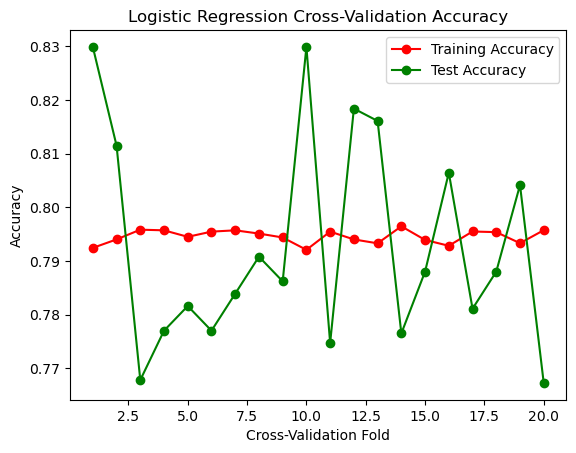

train average : 0.7945594384642912
test average : 0.7928174161767043


In [78]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')


plt.title('Logistic Regression Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.2.2 Random Forest Classifier

In [79]:
#define objective function for hyperparameter optimization using optuna
def objective_RandomForest(trial):

  #define hyperparameters to optimize for
  params = {
    "n_estimators" : trial.suggest_int('n_estimators', 50, 1000),
    "max_depth" : trial.suggest_int('max_depth', 10, 100),
    "min_samples_split" : trial.suggest_int('min_samples_split', 2, 20),
    'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 4),
  }

  #create XGBClassifier model with optimized hyperparameters
  model = RandomForestClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=cv).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_RandomForest, n_trials=10)

[I 2024-04-07 12:51:38,727] Trial 10 finished with value: 0.7952423327506754 and parameters: {'n_estimators': 100, 'max_depth': 23, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 10 with value: 0.7952423327506754.
[I 2024-04-07 12:51:45,066] Trial 11 finished with value: 0.7978854812225225 and parameters: {'n_estimators': 81, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 11 with value: 0.7978854812225225.
[I 2024-04-07 12:51:50,362] Trial 12 finished with value: 0.7969601144128396 and parameters: {'n_estimators': 68, 'max_depth': 19, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 11 with value: 0.7978854812225225.
[I 2024-04-07 12:51:54,946] Trial 13 finished with value: 0.7966142274484878 and parameters: {'n_estimators': 64, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 11 with value: 0.7978854812225225.
[I 2024-04-07 12:53:03,240] Trial 14 finished with value: 0.7967336723343398 and pa

In [80]:
#get best hyperparameters
best_params_randomforest = study.best_params
print(f'Best hyperparameters: {best_params_randomforest}')

Best hyperparameters: {'n_estimators': 392, 'max_depth': 37, 'min_samples_split': 15, 'min_samples_leaf': 3}


When utilizing Optuna to determine the optimal hyperparameters, following the same setup as in the LGBM and RFE methods, the best hyperparameters are found to be: _n_estimators_ of 934, _max_depth_ of 97, _min_samples_split_ of 13, and _min_samples_leaf_ of 2.

In [81]:
#create XGBClassifier model with best hyperparameters
model_RandomForestClassifier = RandomForestClassifier(**best_params_randomforest, random_state=0)
#fit and predict using model
model_RandomForestClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_RandomForestClassifier.predict(test_FeatureSelection_LGM)
#scores = cross_val_score(model_RandomForestClassifier, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=10, shuffle = True), scoring='accuracy')
scores = cross_validate(model_RandomForestClassifier, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
optuna_modelsAccuracy.append(scores['test_score'].mean())
scores['test_score'].mean()

0.797764712113989

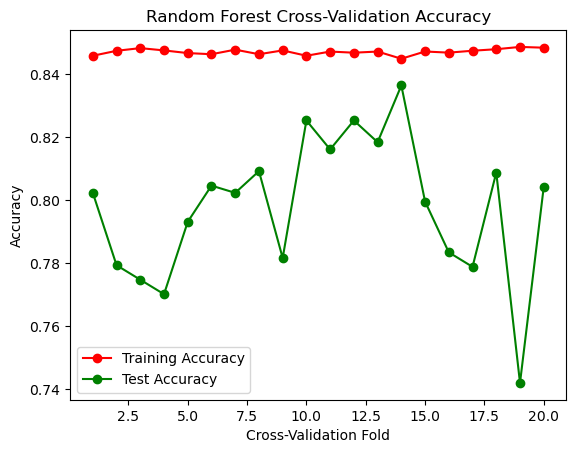

train average : 0.8471062524362996
test average : 0.797764712113989


In [82]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('Random Forest Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.2.3 Naive Bayes

##### 5.2.3.1 Gaussian Naive Bayes

In [125]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

def objective_GNB(trial):
    # Define the hyperparameters to optimize
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-10, 1e-1)

    # Create the Gaussian Naive Bayes classifier with the hyperparameters
    model = GaussianNB(var_smoothing=var_smoothing)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=cv).mean()

    return score

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective_GNB, n_trials=10)

[I 2024-04-07 21:36:59,665] A new study created in memory with name: no-name-48253944-f280-4fde-aa37-d826af15f8a7
[I 2024-04-07 21:36:59,733] Trial 0 finished with value: 0.7102171725197308 and parameters: {'var_smoothing': 0.0005290324203439358}. Best is trial 0 with value: 0.7102171725197308.
[I 2024-04-07 21:36:59,808] Trial 1 finished with value: 0.7105715345092432 and parameters: {'var_smoothing': 0.0001261306627140516}. Best is trial 1 with value: 0.7105715345092432.
[I 2024-04-07 21:36:59,873] Trial 2 finished with value: 0.7114942528735632 and parameters: {'var_smoothing': 2.474595016358138e-09}. Best is trial 2 with value: 0.7114942528735632.
[I 2024-04-07 21:36:59,947] Trial 3 finished with value: 0.7104650670056677 and parameters: {'var_smoothing': 1.6596082389192782e-09}. Best is trial 2 with value: 0.7114942528735632.
[I 2024-04-07 21:37:00,007] Trial 4 finished with value: 0.7111385666613697 and parameters: {'var_smoothing': 2.962050371247272e-08}. Best is trial 2 with va

In [126]:
#get best hyperparameters
best_params_GNB = study.best_params
best_accuracy_GNB = study.best_value
print(f'Best hyperparameters: {best_params_GNB}')

Best hyperparameters: {'var_smoothing': 2.474595016358138e-09}


When employing Optuna to identify the optimal hyperparameters, following the same setup as in the LGBM and RFE methods, the best hyperparameter is found

In [129]:
#create XGBClassifier model with best hyperparameters
model_GNB = GaussianNB(**best_params_GNB)
#fit and predict using model
model_GNB.fit(X_FeatureSelection_LGM, y)
predictions_GNBClassifier = model_GNB.predict(test_FeatureSelection_LGM)
#scores = cross_val_score(model_logisticRegression, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=20, shuffle = True), scoring='accuracy')
scorer = make_scorer(accuracy_score)
scores = cross_validate(model_GNB, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
optuna_modelsAccuracy.append(scores['test_score'].mean())
scores['test_score'].mean()

0.7101167964404894

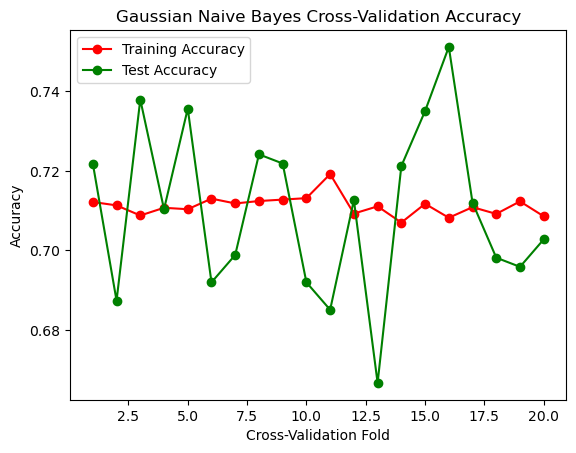

train average : 0.7111832901870248
test average : 0.7101167964404894


In [130]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('Gaussian Naive Bayes Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

##### 5.2.3.2 Bernoulli Naive Bayes


In [131]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB

def objective_BNB(trial):
    # Define the hyperparameters to optimize
    alpha = trial.suggest_loguniform('alpha', 1e-10, 1e-1)
    binarize = trial.suggest_uniform('binarize', 0.0, 1.0)
    fit_prior = trial.suggest_categorical('fit_prior', [True, False])

    # Create the Bernoulli Naive Bayes classifier with the hyperparameters
    model = BernoulliNB(alpha=alpha, binarize=binarize, fit_prior=fit_prior)

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=cv).mean()

    return score

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective_BNB, n_trials=10)

# Get the best hyperparameters and the best accuracy
best_params = study.best_params
best_accuracy = study.best_value

[I 2024-04-07 21:39:36,847] A new study created in memory with name: no-name-747b4fe6-fad5-4b63-be63-03fff1de8bda
[I 2024-04-07 21:39:36,929] Trial 0 finished with value: 0.7486524709995231 and parameters: {'alpha': 0.006332792531524113, 'binarize': 0.1634642610917545, 'fit_prior': False}. Best is trial 0 with value: 0.7486524709995231.
[I 2024-04-07 21:39:37,015] Trial 1 finished with value: 0.7457701679114359 and parameters: {'alpha': 0.0003852915796529735, 'binarize': 0.4003839322362014, 'fit_prior': True}. Best is trial 0 with value: 0.7486524709995231.
[I 2024-04-07 21:39:37,097] Trial 2 finished with value: 0.7500272789872345 and parameters: {'alpha': 1.9119924808794856e-10, 'binarize': 0.057711398110179446, 'fit_prior': True}. Best is trial 2 with value: 0.7500272789872345.
[I 2024-04-07 21:39:37,183] Trial 3 finished with value: 0.7464619418401399 and parameters: {'alpha': 1.039039930238635e-06, 'binarize': 0.686264057810367, 'fit_prior': False}. Best is trial 2 with value: 0.7

In [132]:
#get best hyperparameters
best_params_BNB = study.best_params
best_accuracy_BNB = study.best_value
print(f'Best hyperparameters: {best_params_BNB}')

Best hyperparameters: {'alpha': 1.1435704818481603e-08, 'binarize': 0.013540832773843547, 'fit_prior': True}


When utilizing Optuna to ascertain the best hyperparameters, following the same configuration as in the LGBM and RFE methods, the optimal hyperparameters are identified above.

In [133]:
#create XGBClassifier model with best hyperparameters
model_BNB = BernoulliNB(**best_params_BNB)
#fit and predict using model
model_BNB.fit(X_FeatureSelection_LGM, y)
predictions_GNBClassifier = model_BNB.predict(test_FeatureSelection_LGM)
#scores = cross_val_score(model_logisticRegression, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=20, shuffle = True), scoring='accuracy')
scorer = make_scorer(accuracy_score)
scores = cross_validate(model_BNB, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
optuna_modelsAccuracy.append(scores['test_score'].mean())
scores['test_score'].mean()

0.7504820170559882

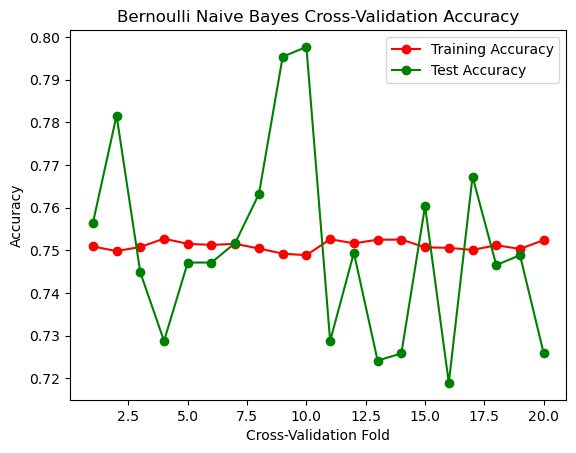

train average : 0.7510761820090084
test average : 0.7504820170559882


In [135]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('Bernoulli Naive Bayes Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.2.4 XGBClassifier

In [87]:

#define objective function for hyperparameter optimization using optuna
def objective_XGBoost(trial):

  #define hyperparameters to optimize for
  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 10, 100),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'subsample': trial.suggest_uniform('subsample', 0.1, 1),
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
      #'gamma': trial.suggest_uniform('gamma', 0, 1),
      'alpha': trial.suggest_loguniform('alpha', 2, 5),
      'lambda': trial.suggest_loguniform('lambda', 2, 5),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = XGBClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=cv)
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_XGBoost, n_trials=5)

[W 2024-04-07 12:57:35,121] Trial 10 failed with parameters: {'n_estimators': 765, 'max_depth': 59, 'learning_rate': 0.39535326445983965, 'subsample': 0.6093278746654717, 'colsample_bytree': 0.9998028661794263, 'alpha': 4.828010884567651, 'lambda': 3.191960172487067, 'min_child_weight': 211} because of the following error: The value array([0.74482759, 0.77471264, 0.7908046 , 0.76321839, 0.7816092 ,
       0.7816092 , 0.74712644, 0.75862069, 0.76551724, 0.73793103,
       0.76551724, 0.7816092 , 0.76781609, 0.76497696, 0.71658986,
       0.79032258, 0.78341014, 0.78571429, 0.76497696, 0.7764977 ]) could not be cast to float.
[W 2024-04-07 12:57:35,122] Trial 10 failed with value array([0.74482759, 0.77471264, 0.7908046 , 0.76321839, 0.7816092 ,
       0.7816092 , 0.74712644, 0.75862069, 0.76551724, 0.73793103,
       0.76551724, 0.7816092 , 0.76781609, 0.76497696, 0.71658986,
       0.79032258, 0.78341014, 0.78571429, 0.76497696, 0.7764977 ]).
[W 2024-04-07 12:57:50,456] Trial 11 failed

In [88]:
#get best hyperparameters
best_params_xgbClassifer = study.best_params
print(f'Best hyperparameters: {best_params_xgbClassifer}')

Best hyperparameters: {'alpha': 0.010974793019006076, 'binarize': 0.5119524454215818, 'fit_prior': True}


In [89]:
#create XGBClassifier model with best hyperparameters
model_XGBClassifier = XGBClassifier(**best_params_xgbClassifer, random_state=0)
#fit and predict using model
model_XGBClassifier.fit(X_FeatureSelection_LGM, y)
predictions_XGBClassifier = model_XGBClassifier.predict(test_FeatureSelection_LGM)
#scores = cross_val_score(model_XGBClassifier, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=20, shuffle = True), scoring='accuracy')
scores = cross_validate(model_XGBClassifier, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
optuna_modelsAccuracy.append(scores['test_score'].mean())
scores['test_score'].mean()

0.8022623020287092

train average : 0.8838266721573484
test average : 0.8022623020287092


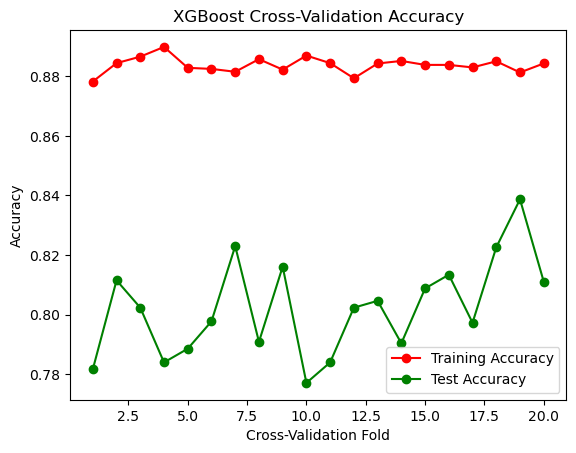

In [90]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

print(f"train average : {train_average}")
print(f"test average : {test_average}")

plt.title('XGBoost Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 5.2.5 CatBoostClassifier 

In [91]:
def objective_CatboostClassfier(trial): 
#define hyperparameters to optimize for
  params = {
      'iterations': trial.suggest_int('iterations', 100, 1000),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'depth': trial.suggest_int('depth', 3, 10),
      'loss_function': 'MultiClass'
  }

  #create XGBClassifier model with optimized hyperparameters
  model = CatBoostClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=cv).mean()
    
  return score

In [92]:
%%capture

study.optimize(objective_CatboostClassfier, n_trials=10)
print(f'Best hyperparameters: {study.best_params}')

[I 2024-04-07 12:59:36,011] Trial 15 finished with value: 0.8073099740452356 and parameters: {'iterations': 522, 'learning_rate': 0.06219631030028409, 'depth': 8}. Best is trial 15 with value: 0.8073099740452356.
[I 2024-04-07 13:01:00,348] Trial 16 finished with value: 0.8052425975952117 and parameters: {'iterations': 492, 'learning_rate': 0.06132844349231849, 'depth': 8}. Best is trial 15 with value: 0.8073099740452356.
[I 2024-04-07 13:02:22,517] Trial 17 finished with value: 0.8051279199110122 and parameters: {'iterations': 479, 'learning_rate': 0.07368404546551036, 'depth': 8}. Best is trial 15 with value: 0.8073099740452356.
[I 2024-04-07 13:03:54,775] Trial 18 finished with value: 0.805242067906139 and parameters: {'iterations': 539, 'learning_rate': 0.05367826363551284, 'depth': 8}. Best is trial 15 with value: 0.8073099740452356.
[I 2024-04-07 13:04:14,220] Trial 19 finished with value: 0.7991458763705704 and parameters: {'iterations': 421, 'learning_rate': 0.0215514781282711,

In [93]:
best_params_catboost = study.best_params
print("Best Hyperparameters:", best_params_catboost)

Best Hyperparameters: {'iterations': 206, 'learning_rate': 0.24007460295398642, 'depth': 5}


In [94]:
%%capture
model_CatBoostClassifier = CatBoostClassifier(**best_params_catboost, random_state=0)
model_CatBoostClassifier.fit(X_FeatureSelection_LGM,y)
#score = cross_val_score(model_CatBoostClassifier, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=10, shuffle = True)).mean()
scores = cross_validate(model_XGBClassifier, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
optuna_modelsAccuracy.append(scores['test_score'].mean())
scores['test_score'].mean()

0:	learn: 0.6218307	total: 3.91ms	remaining: 802ms
1:	learn: 0.5733495	total: 6.65ms	remaining: 678ms
2:	learn: 0.5311665	total: 10.3ms	remaining: 694ms
3:	learn: 0.5124592	total: 13.2ms	remaining: 664ms
4:	learn: 0.4967373	total: 16.4ms	remaining: 658ms
5:	learn: 0.4786392	total: 19.2ms	remaining: 641ms
6:	learn: 0.4678799	total: 22.4ms	remaining: 636ms
7:	learn: 0.4631824	total: 25.8ms	remaining: 639ms
8:	learn: 0.4592985	total: 29.1ms	remaining: 637ms
9:	learn: 0.4520475	total: 36ms	remaining: 706ms
10:	learn: 0.4472025	total: 39.1ms	remaining: 692ms
11:	learn: 0.4438720	total: 42.1ms	remaining: 680ms
12:	learn: 0.4410168	total: 45.9ms	remaining: 682ms
13:	learn: 0.4382355	total: 49.9ms	remaining: 685ms
14:	learn: 0.4350642	total: 55.6ms	remaining: 709ms
15:	learn: 0.4286865	total: 58.7ms	remaining: 697ms
16:	learn: 0.4268883	total: 61.9ms	remaining: 689ms
17:	learn: 0.4265193	total: 65.7ms	remaining: 686ms
18:	learn: 0.4252717	total: 70.7ms	remaining: 696ms
19:	learn: 0.4229360	tot

62:	learn: 0.3745391	total: 209ms	remaining: 475ms
63:	learn: 0.3736437	total: 213ms	remaining: 472ms
64:	learn: 0.3726201	total: 216ms	remaining: 468ms
65:	learn: 0.3720390	total: 219ms	remaining: 464ms
66:	learn: 0.3713292	total: 222ms	remaining: 460ms
67:	learn: 0.3705208	total: 225ms	remaining: 456ms
68:	learn: 0.3698727	total: 228ms	remaining: 453ms
69:	learn: 0.3693151	total: 231ms	remaining: 449ms
70:	learn: 0.3687933	total: 235ms	remaining: 446ms
71:	learn: 0.3684797	total: 238ms	remaining: 443ms
72:	learn: 0.3677493	total: 242ms	remaining: 440ms
73:	learn: 0.3658126	total: 245ms	remaining: 437ms
74:	learn: 0.3650629	total: 248ms	remaining: 433ms
75:	learn: 0.3646952	total: 251ms	remaining: 429ms
76:	learn: 0.3644098	total: 254ms	remaining: 425ms
77:	learn: 0.3633441	total: 257ms	remaining: 421ms
78:	learn: 0.3625779	total: 259ms	remaining: 417ms
79:	learn: 0.3620278	total: 262ms	remaining: 413ms
80:	learn: 0.3613247	total: 268ms	remaining: 413ms
81:	learn: 0.3606554	total: 272

0.8043254409661529

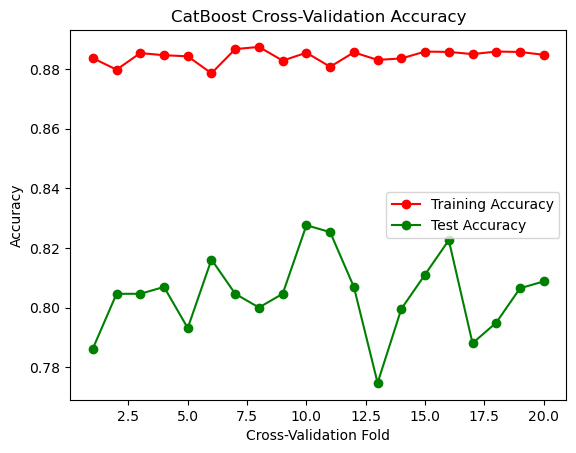

train average : 0.8841959537979236
test average : 0.8043254409661529


In [95]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('CatBoost Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

### 5.3 Model tuning using RandomSearch

RandomSearch is a hyperparameter tuning algorithm that randomly selects hyperparameter combinations from a predefined space, offering a faster alternative to Grid Search when dealing with numerous hyperparameters [46][47]. Its advantages include the potential to discover unexpected yet effective hyperparameter combinations and a reduced risk of model overfitting [47]. However, its randomness can introduce significant variance in results, and there’s a possibility of missing the optimal hyperparameter set if the number of iterations is insufficient [47].

[46] J. Brownlee, “Random search and grid search for function optimization,” MachineLearningMastery.com, [Link](https://machinelearningmastery.com/random-search-and-grid-search-for-function-optimization/) (Accessed Apr. 5, 2024). 

[47] B. Gupta, “Random search in machine learning,” Scaler Topics, [Link](https://www.scaler.com/topics/machine-learning/random-search-in-machine-learning/) (Accessed Apr. 5, 2024). 

In [96]:
randomSearch_modelsAccuracy = []

#### 5.3.1 Logistic Regression

In [97]:
model = LogisticRegression()

hyperparameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(100, 500),
    'multi_class': ['auto', 'ovr', 'multinomial'],
    # Add other hyperparameters here
}

# Set up the random search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameters,
    n_iter=5,
    cv=cv
)
scores = cross_validate(random_search, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
randomSearch_modelsAccuracy.append(scores['test_score'].mean())

#score = cross_val_score(random_search, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=10, shuffle = True)).mean()
#randomSearch_modelsAccuracy.append(score)

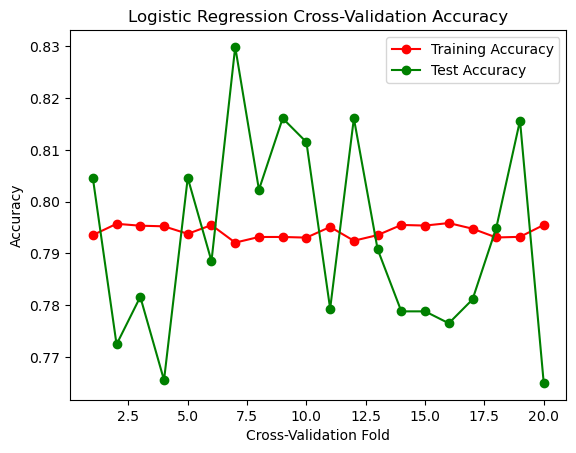

train average : 0.7942445915214476
test average : 0.7927000900471424


In [98]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('Logistic Regression Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.3.2 Random Forest Classifier

In [99]:
model = RandomForestClassifier()

param_distributions = {
    'n_estimators': randint(100, 2000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': randint(10, 100),  # Maximum number of levels in tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'class_weight': [None, 'balanced', 'balanced_subsample'],  # Weights associated with classes
}


random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=5,  # Number of parameter settings to sample
    cv=cv,     
    n_jobs=-1    # Use all available cores
)

scores = cross_validate(random_search, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
randomSearch_modelsAccuracy.append(scores['test_score'].mean())
# score = cross_val_score(random_search, X_FeatureSelection_LGM, y, cv=StratifiedKFold(n_splits=10, shuffle = True)).mean()


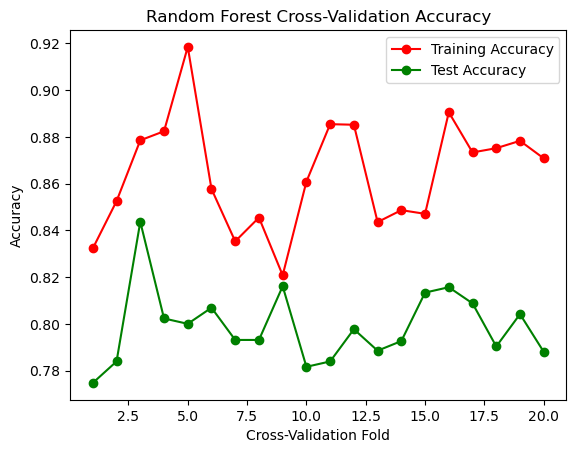

train average : 0.8641251882510084
test average : 0.7989210233592882


In [100]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')


plt.title('Random Forest Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.3.3 Naive Bayes Classifier

##### 5.3.3.1 Gaussian Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

param_distributions = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter for variance
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=5,  # Number of parameter settings to sample
    cv=cv,
    n_jobs=-1  # Use all available cores
)

scores = cross_validate(random_search, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
randomSearch_modelsAccuracy.append(scores['test_score'].mean())


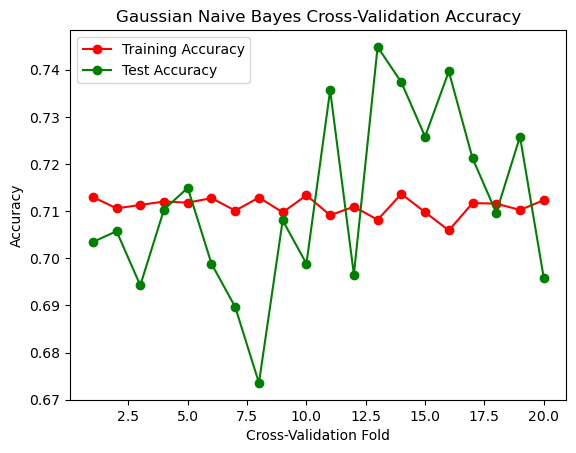

train average : 0.71105004130181
test average : 0.7115006091424334


In [102]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('Gaussian Naive Bayes Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

##### 5.3.3.2 Bernoulli Naive Bayes


In [103]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

param_distributions = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Additive (Laplace/Lidstone) smoothing parameter
    'binarize': [0.0, 0.5, 1.0],             # Threshold for binarizing of sample features
    'fit_prior': [True, False]               # Whether to learn class prior probabilities or not
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=5,  # Number of parameter settings to sample
    cv=cv,
    n_jobs=-1  # Use all available cores
)
scores = cross_validate(random_search, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
randomSearch_modelsAccuracy.append(scores['test_score'].mean())


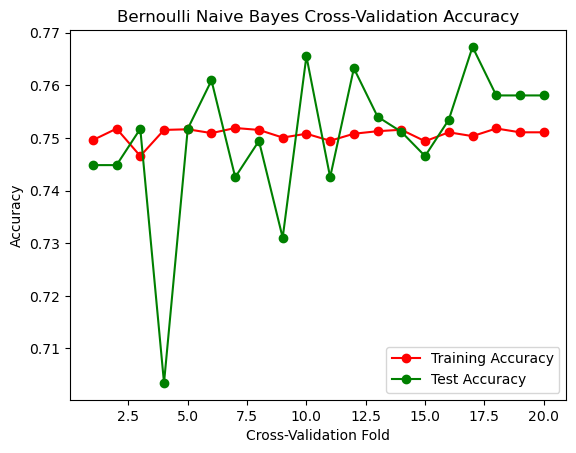

train average : 0.7506947432468409
test average : 0.7499186927273691


In [104]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'r',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')


plt.title('Bernoulli Naive Bayes Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.3.4 XGBoostClassifier

In [105]:
model = XGBClassifier()

xgb_param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.6),
    'subsample': uniform(0.3, 0.7),
    'colsample_bytree': uniform(0.5, 0.9),
    'min_child_weight': randint(1, 10),
    'gamma': uniform(0, 0.5),
    'reg_lambda': uniform(1, 4),
}

xgb_random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=xgb_param_distributions,
    n_iter=5, 
    cv=cv,        
    n_jobs=-1   
)

scores = cross_validate(xgb_random_search, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
randomSearch_modelsAccuracy.append(scores['test_score'].mean())

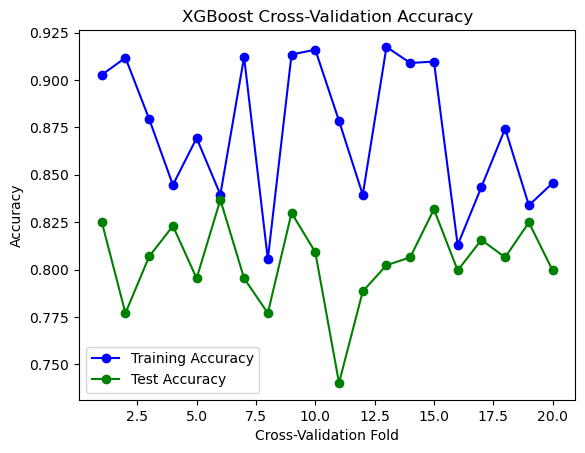

train average : 0.8729230507500114
test average : 0.804561417447958


In [111]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'b',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')

plt.title('XGBoost Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

#### 5.3.5 CatBoostClassifier

In [107]:
%%capture
model = CatBoostClassifier()


catboost_param_distributions = {
    'iterations': randint(100, 1000),
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'random_strength': randint(1, 10),
    'bagging_temperature': uniform(0.0, 1.0),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'scale_pos_weight': uniform(0.01, 1.0),

}


catboost_random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=catboost_param_distributions,
    n_iter=5,  
    cv=cv,
    n_jobs=-1   
)

scores = cross_validate(catboost_random_search, X_FeatureSelection_LGM, y, cv=cv, scoring=scorer, return_train_score=True)
randomSearch_modelsAccuracy.append(scores['test_score'].mean())

0:	learn: 0.6612570	total: 2.7ms	remaining: 1.56s
1:	learn: 0.6304307	total: 5.5ms	remaining: 1.58s
2:	learn: 0.6065098	total: 8.7ms	remaining: 1.67s
3:	learn: 0.5815407	total: 12.4ms	remaining: 1.78s
4:	learn: 0.5697256	total: 15.8ms	remaining: 1.81s
5:	learn: 0.5562953	total: 18.8ms	remaining: 1.79s
6:	learn: 0.5444491	total: 22ms	remaining: 1.79s
7:	learn: 0.5336649	total: 25.4ms	remaining: 1.82s
8:	learn: 0.5226784	total: 28.8ms	remaining: 1.82s
9:	learn: 0.5117718	total: 32.3ms	remaining: 1.84s
10:	learn: 0.5050830	total: 35.6ms	remaining: 1.83s
11:	learn: 0.4967896	total: 39.3ms	remaining: 1.86s
12:	learn: 0.4916352	total: 42.6ms	remaining: 1.85s
13:	learn: 0.4868301	total: 46.1ms	remaining: 1.86s
14:	learn: 0.4822586	total: 49.9ms	remaining: 1.88s
15:	learn: 0.4803921	total: 53.3ms	remaining: 1.88s
16:	learn: 0.4738574	total: 56.5ms	remaining: 1.87s
17:	learn: 0.4718752	total: 59.1ms	remaining: 1.84s
18:	learn: 0.4701094	total: 62.4ms	remaining: 1.84s
19:	learn: 0.4671313	total:

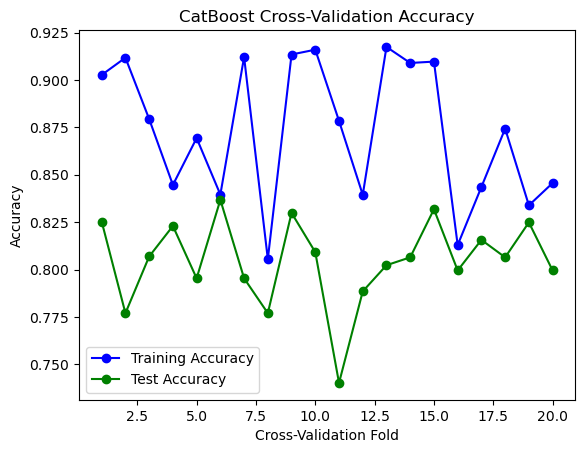

train average : 0.8729230507500114
test average : 0.804561417447958


In [112]:
cv_results = range(1, len(scores['train_score']) + 1)
train_average = np.mean(scores['train_score'])
test_average = np.mean(scores['test_score'])

plt.plot(cv_results, scores['train_score'], 'b',marker='o', label='Training Accuracy')
plt.plot(cv_results, scores['test_score'], 'g', marker='o', label='Test Accuracy')


plt.title('CatBoost Cross-Validation Accuracy')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"train average : {train_average}")
print(f"test average : {test_average}")

### 5.4 Comparison of GridSearch and Optuna 

In [138]:
def tabulate_vectors(vector1, vector2, vector3,vector4):
    # Determine the maximum width for the model names
    max_width = max(len(name) for name in vector1) + 2  # Add some padding

    # Print the header with fixed spacing
    print(f"{'Model'.ljust(max_width)}\t{'GridSearch Accuracy'.ljust(20)}\t{'Random Search'.ljust(20)}\t{'Optuna Accuracy'.ljust(20)}")

    # Print each row of the combined vectors with fixed spacing
    for row in zip(vector1, vector2, vector3,vector4):
        print(f"{row[0].ljust(max_width)}\t{str(row[1]).ljust(20)}\t{str(row[2]).ljust(20)}\t{str(row[3]).ljust(20)}")


# print(gridSearch_modelsAccuracy)
# print(optuna_modelsAccuracy)
# print(randomSearch_modelsAccuracy)
tabulate_vectors(["Logistic Regression", "Random Forest", "Gaussian Naive Bayes", "Bernoulli Naive Bayes" "XGBoost", "CatBoost"], gridSearch_modelsAccuracy, randomSearch_modelsAccuracy, optuna_modelsAccuracy)

Model                         	GridSearch Accuracy 	Random Search       	Optuna Accuracy     
Logistic Regression           	0.7855089131684876  	0.7927000900471424  	0.7928174161767043  
Random Forest                 	0.7860839562967222  	0.7989210233592882  	0.797764712113989   
Gaussian Naive Bayes          	0.7780333525014376  	0.7115006091424334  	0.8022623020287092  
Bernoulli Naive BayesXGBoost  	0.7935595169637722  	0.7499186927273691  	0.8043254409661529  
CatBoost                      	0.7843588269120184  	0.7984535727527942  	0.7101167964404894  


The comparison between the Optuna and GridSearch hyperparameter optimization algorithms indicates that Optuna converges to better hyperparameters. The models produced by Optuna exhibit slightly better performance in terms of accuracy compared to those generated by the GridSearch algorithm and Random Search. Hence, Optuna will be employed due to its ability to achieve superior hyperparameters with fewer trials and less computational power when compared to the other methods.

## 6. Model Selection

In addition to Optuna, CatBoost is chosen as the algorithm for model selection. The decision to utilize CatBoost alongside Optuna is supported by its superior performance compared to other models. 

As shown in the table above, CatBoost consistently achieves higher accuracy scores compared to other models, both with GridSearch and Optuna. For instance, the accuracy of CatBoost with Optuna optimization is notably higher than that of Logistic Regression, Random Forest, and XGBoost. This superior performance makes CatBoost an ideal candidate for the model selection process.

Therefore, the combination of Optuna with CatBoost is chosen as the preferred approach for solving the model selection task, given its ability to deliver superior accuracy and robust performance across various datasets.

In [110]:
sample = pd.read_csv("sample_submission.csv")
sample['Transported'] = model_CatBoostClassifier.predict(test_df)
#This converts the numbers to True/False values
sample['Transported']=sample['Transported'].astype(bool)
sample.to_csv('submission.csv', index=False)